In [ ]:
## As we have found out optimal hyperparameter so we will do the testing on that optimal parameter using 2 months data as training as 1 month for testing

In [1]:
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import requests
import json
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

In [2]:
from datetime import datetime
# current date and time
now = datetime.now()
now  = datetime(2019,3,1,0,0,0)
timestamp = datetime.timestamp(now)
print("Time stamp for 1st March 2019 :", timestamp)

Time stamp for 1st March 2019 : 1551378600.0


### Collect the weather data for a given time interval
1. link: https://darksky.net/dev

In [4]:
csv_columns = ['time', 'summary', 'icon', 'precipIntensity','precipProbability', 'temperature', 'apparentTemperature', 'dewPoint', 'humidity', 'pressure', 'windSpeed', 'windGust', 'windBearing', 'cloudCover', 'uvIndex', 'visibility', 'ozone']
import pandas as pd
from datetime import datetime
#csv_file = "Names.csv"
df = pd.DataFrame(columns=csv_columns)
dec = df.to_csv('March_w_2019.csv',index = False)       
tim =  1551378600
count = 0
debug=0
l = []
while(count<30):
    url = "https://api.darksky.net/forecast/7d5861af747b98aead0c3d5c9d44171c/23.0225,72.5714,"+str(tim)
    response = requests.get(url)
    data = response.text
    parsed = json.loads(data)
    h_data = parsed['hourly']['data']
    for d in h_data:
        d_c = []
        l.append(len(d))
        #if debug==282:
            #print("282 rows data :",len(d))
       # if debug==283:
            #print("**************************************************")
            #print("566 row data:",d)
            #print(len(d))
            #break
        for v in d.keys():
            if v=='time':
                    timestamp = d[v]
                    #print(timestamp)
                    d_c.append(datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S'))
                    continue
           # else:
                #print(v)
            if v=='precipType':
                continue
            d_c.append(d[v])#(datetime.datetime.fromtimestamp(d[v]).strftime('%Y-%m-%d %H:%M:%S'))
    
        with open("March_w_2019.csv", "a") as fp:
            wr = csv.writer(fp, dialect='excel')
            wr.writerow(d_c)
        fp.close()
        debug = debug+1
    
    tim = tim+24*60*60
    count = count+1

In [3]:
data = pd.read_csv('weather.csv')## data for may
d1 = pd.read_csv('April_w_2019.csv')
d2 = pd.read_csv('March_w_2019.csv')
data = pd.concat([d2,d1,data],axis=0)
data = data.reset_index()
data.head()

index                 time        summary                 icon  \
0      0  2019-03-01 00:00:00  Partly Cloudy  partly-cloudy-night   
1      1  2019-03-01 01:00:00          Clear          clear-night   
2      2  2019-03-01 02:00:00          Clear          clear-night   
3      3  2019-03-01 03:00:00          Clear          clear-night   
4      4  2019-03-01 04:00:00          Clear          clear-night   

   precipIntensity  precipProbability  temperature  apparentTemperature  \
0              0.0                0.0        65.13                65.13   
1              0.0                0.0        63.34                63.34   
2              0.0                0.0        61.56                61.56   
3              0.0                0.0        59.72                59.72   
4              0.0                0.0        57.89                57.89   

   dewPoint  humidity  pressure  windSpeed  windGust  windBearing  cloudCover  \
0     36.02      0.34   1013.33       2.86      5.83           73        0.19   
1     34.80      0.34   1013.11       1.81      5.88          116        0.09   
2     35.39      0.38   1013.03       3.04      6.13           39        0.00   
3     36.19      0.41   1013.02       5.57      6.55           27        0.01   
4     37.15      0.46   1012.92       4.26      7.13           15        0.01   

   uvIndex  visibility  ozone  
0        0       2.488  249.7  
1        0       2.488  250.1  
2        0       2.488  250.6  
3        0       8.731  250.9  
4        0       8.731  251.2

In [4]:
data.shape

(2160, 18)

In [5]:
data = data.drop(['index'],axis=1)

In [6]:
print("Total size of the dataset :",data.shape)

Total size of the dataset : (2160, 17)


Text(0, 0.5, 'Wind Bearing')

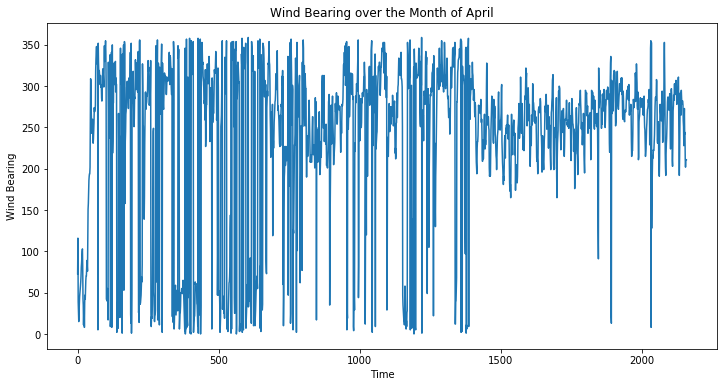

In [7]:
plt.figure(figsize=(12,6))
plt.plot(data['windBearing'].values)
plt.title("Wind Bearing over the Month of April")
plt.xlabel("Time")
plt.ylabel("Wind Bearing")

Text(0.5, 1.0, 'Temperature Variation with Time')

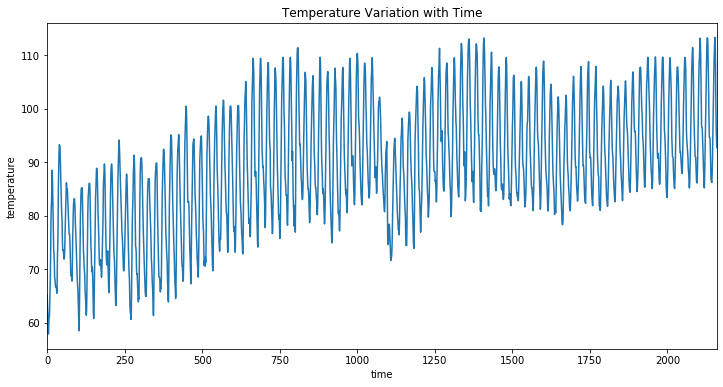

In [8]:
plt.figure(figsize=(12,6))
data['temperature'].plot()
plt.xlabel("time")
plt.ylabel("temperature")
plt.title("Temperature Variation with Time")

Text(0.5, 1.0, 'Wind Speed Variation with Time')

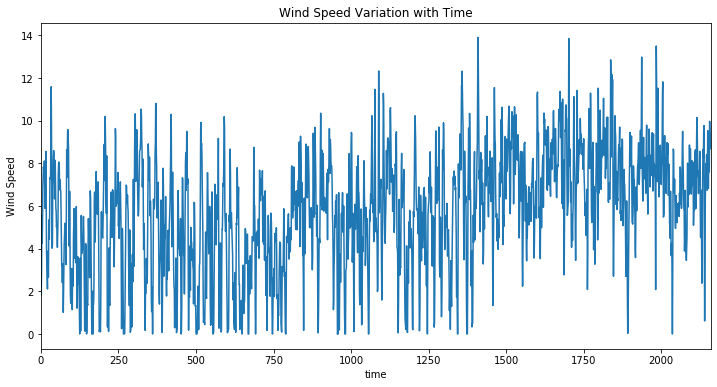

In [9]:
plt.figure(figsize=(12,6))
data['windSpeed'].plot()
plt.xlabel("time")
plt.ylabel("Wind Speed")
plt.title("Wind Speed Variation with Time")

Text(0.5, 1.0, 'Apparent Temperature Variation with Time')

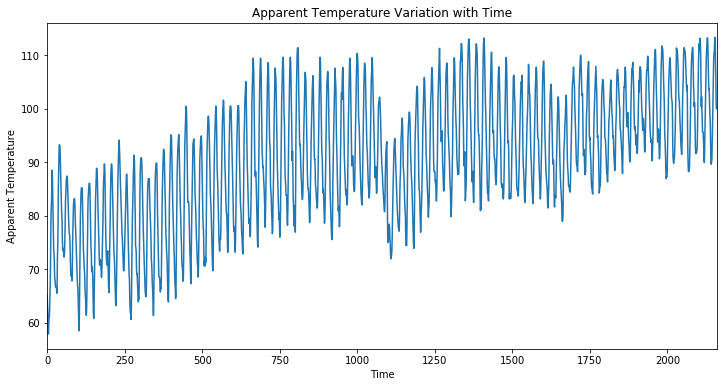

In [10]:
plt.figure(figsize=(12,6))
data['apparentTemperature'].plot()
plt.xlabel("Time")
plt.ylabel("Apparent Temperature")
plt.title("Apparent Temperature Variation with Time")

Text(0.5, 1.0, 'Apparent Temperature Variation with Temperature')

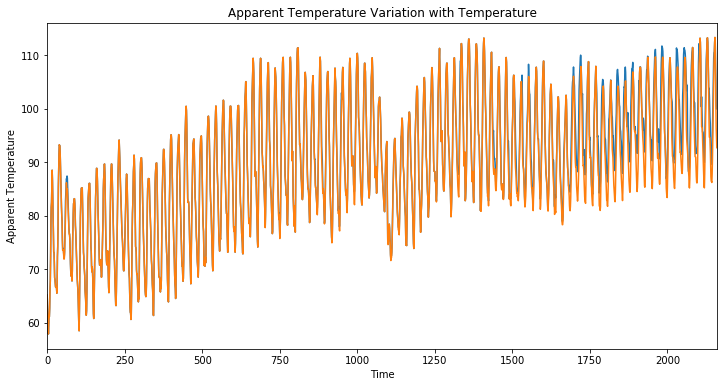

In [11]:
plt.figure(figsize=(12,6))
data['apparentTemperature'].plot()
data['temperature'].plot()
plt.xlabel("Time")
plt.ylabel("Apparent Temperature")
plt.title("Apparent Temperature Variation with Temperature")

In [12]:
np.corrcoef(data['temperature'],data['apparentTemperature'])   ## There is a very high correlation between two features so we can drop one of them

array([[1.        , 0.98495821],
       [0.98495821, 1.        ]])

Text(0, 0.5, 'cloud cover')

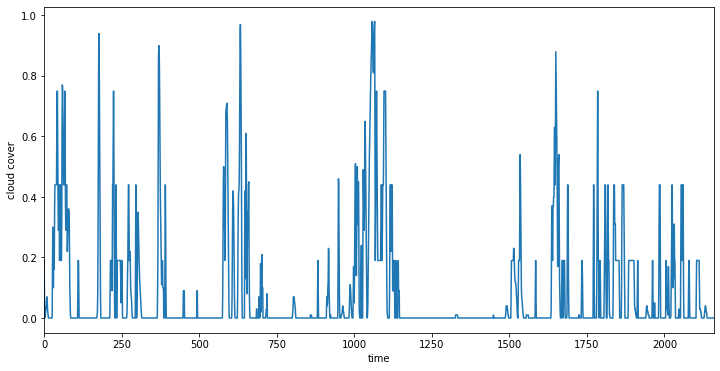

In [13]:
plt.figure(figsize=(12,6))
data['cloudCover'].plot()
plt.xlabel("time")
plt.ylabel("cloud cover")

In [14]:
tem = data['temperature'].values
hum = data['humidity'].values
cloud = data['cloudCover'].values
wind = data['windSpeed'].values
#windBearing = data['windBearing'].values

In [15]:
bearing = []
for v in data['windBearing'].values:
    bearing.append(v)
    bearing.append(bearing[-1])
    bearing.append(bearing[-1])

In [16]:
apptem = []
for v in data['apparentTemperature'].values:
    apptem.append(v)
    apptem.append(apptem[-1])
    apptem.append(apptem[-1])

In [17]:
dew = []
for v in data['dewPoint'].values:
    dew.append(v)
    dew.append(dew[-1])
    dew.append(dew[-1])

In [18]:
temperature = []
for v in tem:
    temperature.append(v)
    temperature.append(temperature[-1])
    temperature.append(temperature[-1])

In [19]:
windspeed = []
for v in wind:
    windspeed.append(v)
    windspeed.append(windspeed[-1])
    windspeed.append(windspeed[-1])

In [20]:
humidity = []
for v in hum:
    humidity.append(v)
    humidity.append(humidity[-1])
    humidity.append(humidity[-1])

In [21]:
cloudCover = []
for v in cloud:
    cloudCover.append(v)
    cloudCover.append(cloudCover[-1])
    cloudCover.append(cloudCover[-1])

In [22]:
len(temperature),len(humidity),len(cloudCover),len(bearing)

(6480, 6480, 6480, 6480)

Text(0, 0.5, 'temperature')

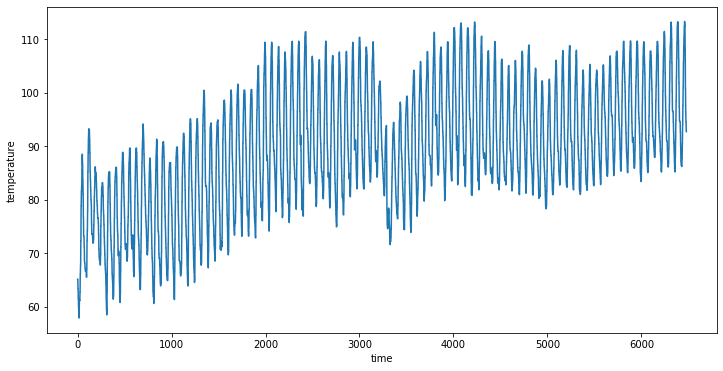

In [23]:
plt.figure(figsize=(12,6))
plt.plot(temperature)
plt.xlabel("time")
plt.ylabel("temperature")

## Convert the timestamp to date:

In [106]:
import requests
import pandas as pd
import os
import numpy as np
import  json
import time 


def time_to_epoch(yyyy, mm, dd, t):
    t_stamp = str(yyyy).zfill(4) + '-' + str(mm).zfill(2) + '-' + str(dd).zfill(2) + 'T' + str(t)
    time_tuple = time.strptime(t_stamp, '%Y-%m-%dT%H:%M')
    time_epoch = time.mktime(time_tuple)
    return time_epoch


def epoch_to_timestring(n):
    return time.strftime('%Y-%m-%dT%H:%M', time.localtime(n))


# some global variables
private_server_url = 'http://127.0.0.1:5000'
header = {'Content-Type':'application/json'}
imars_base_url = 'http://14.215.130.185:20000'
time_stamps_list = ['UID','00:00', '00:20', '00:40', '01:00', '01:20', '01:40', '02:00', '02:20', '02:40', '03:00', '03:20',
                    '03:40', '04:00', '04:20', '04:40', '05:00', '05:20', '05:40', '06:00', '06:20', '06:40', '07:00',
                    '07:20', '07:40', '08:00', '08:20', '08:40', '09:00', '09:20', '09:40', '10:00', '10:20', '10:40',
                    '11:00', '11:20', '11:40', '12:00', '12:20', '12:40', '13:00', '13:20', '13:40', '14:00', '14:20',
                    '14:40', '15:00', '15:20', '15:40', '16:00', '16:20', '16:40', '17:00', '17:20', '17:40', '18:00',
                    '18:20', '18:40', '19:00', '19:20', '19:40', '20:00', '20:20', '20:40', '21:00', '21:20', '21:40',
                    '22:00', '22:20', '22:40', '23:00', '23:20', '23:40']
device_ids = [33140, 32977, 32684, 32934, 32804, 33096, 32984, 32985, 32725, 19380, 33131]

# Session preserves cookies from login accross https calls
s = requests.session()
# login
auth_data_imars = [
  ('username', 'iitg_in'),
  ('password', 'invt')]
login_response_imars = s.request('POST', imars_base_url + '/login.action', data=auth_data_imars)


# yyyy = 2018
# mm = 10
# dd = 1
# device_id = device_ids[1]

# Func to retreive data from solar panel energy portal for given date
# date format: 'yyyy-mm-dd'
def get_data(device_id, yyyy, mm, dd):
    date = str(yyyy).zfill(4) + '-' + str(mm).zfill(2) + '-' + str(dd).zfill(2)
    params_report = (('level', '3'), ('type', '1'), ('searchIds', device_id), ('searchDate', date))
    # searchIds = ID for panels/inverter...level=?, type=?
    date_report = s.request('GET', imars_base_url + '/reportjson/exportReport.action', params=params_report)
    #print(date_report.url)

    try:
        output = open('./data/{}/{}'.format(device_id, date+'.xls'), 'wb')
    except FileNotFoundError:
        os.makedirs('./data/{}'.format(device_id))
        output = open('./data/{}/{}'.format(device_id, date+'.xls'), 'wb')

    output.write(date_report.content)
    output.close()

    pd_data = pd.ExcelFile('./data/{}/{}'.format(device_id, date+'.xls'))
    pd_data_day = pd.read_excel(pd_data, 'dayReport')
   # print(pd_data_day)
    energy = np.array(pd_data_day[1:2])
    device_name = energy[0][0]
    #print('device_name:',device_name)

    t = np.array(pd_data_day[:1])
    t = np.delete(t, np.s_[:1], 1)
    t_list = list(t[0])

    energy = np.delete(energy, np.s_[:1], 1)
    energy = energy.astype(np.float32, copy=False)
    energy_list = list(energy[0])

    dict_t_e = {}
    # dict_forDF = {'date': date, 'name': device_name}
    for t, e in zip(t_list, energy_list):
        dict_t_e.update({t: e})
    return dict_t_e


yyyy = 2019
mm = 3
#dd = 23
import csv
import datetime

csv_columns =   ['00:00', '00:20', '00:40', '01:00', '01:20', '01:40', '02:00', '02:20', '02:40', '03:00', '03:20',
                    '03:40', '04:00', '04:20', '04:40', '05:00', '05:20', '05:40', '06:00', '06:20', '06:40', '07:00',
                    '07:20', '07:40', '08:00', '08:20', '08:40', '09:00', '09:20', '09:40', '10:00', '10:20', '10:40',
                    '11:00', '11:20', '11:40', '12:00', '12:20', '12:40', '13:00', '13:20', '13:40', '14:00', '14:20',
                    '14:40', '15:00', '15:20', '15:40', '16:00', '16:20', '16:40', '17:00', '17:20', '17:40', '18:00',
                    '18:20', '18:40', '19:00', '19:20', '19:40', '20:00', '20:20', '20:40', '21:00', '21:20', '21:40',
                    '22:00', '22:20', '22:40', '23:00', '23:20', 'Date']

#csv_file = "Names.csv"
df = pd.DataFrame(columns=csv_columns)
# name of the csv is in month+year+station_name    
dec = df.to_csv('MAR_B_2019.csv',index=False)

# device id 0 -> Firpeal Hostel Capacity -> 25 kW,Serial No -> I01161005922
# device id 1 -> Beauki Hostel, Capacity -> 15 kW, Serial No -> I01163009107
# device id 2 -> Chimair Hostel, Capacity -> 15 kW, Serial No -> I01161006486
# device id 3 -> Duven Hostel, Capacity -> 15 kW, Serial No -> I01161004187
# device id 4 -> Emiet Hostel Capacity -> 25 kW, Serial No -> I01161005921
# device id 5 -> No Working
# device id 6 -> Working but still unknown
# device id 7 -> Not Working
# device id 8 -> Not Working
# device id 9 -> Not Working
# device id 10 -> Aibaan Hostel, Capacity -> 25 Kw,Serial No -> I01161005931
# device id 11 -> 
device_id = device_ids[1]
count = 1
for dd in range(1,31):
    print("count: ",count)
    count+=1
    l = []
    dict_t_e=get_data(device_id, yyyy, mm, dd)
    x = datetime.datetime(yyyy,mm,dd)
    #print(dict_t_e)
    for d in dict_t_e.keys():
        l.append(dict_t_e[d])
    l.append(x)
    with open("MAR_B_2019.csv", "a") as fp:
        wr = csv.writer(fp, dialect='excel')
        wr.writerow(l)
    fp.close()

count:  1
count:  2
count:  3
count:  4
count:  5
count:  6
count:  7
count:  8
count:  9
count:  10
count:  11
count:  12
count:  13
count:  14
count:  15
count:  16
count:  17
count:  18
count:  19
count:  20
count:  21
count:  22
count:  23
count:  24
count:  25
count:  26
count:  27
count:  28
count:  29
count:  30


In [24]:
data = pd.read_csv('xyz.csv') ##reading the data for April
d1 = pd.read_csv('MAY_B_2019.csv')  ## reading data for May 2019
d2 = pd.read_csv('MAR_B_2019.csv')

In [25]:
d1.shape,d2.shape,data.shape

((30, 72), (30, 72), (30, 72))

In [26]:
data = pd.concat([d2,data,d1],axis=0)  #concating both the dataframe
data = data.reset_index()

In [27]:
data.shape

(90, 73)

In [28]:
data = data.drop(['index'],axis=1)
data.head()

00:00  00:20  00:40  01:00  01:20  01:40  02:00  02:20  02:40  03:00  ...  \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   

   20:40  21:00  21:20  21:40  22:00  22:20  22:40  23:00  23:20  \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

                  Date  
0  2019-03-01 00:00:00  
1  2019-03-02 00:00:00  
2  2019-03-03 00:00:00  
3  2019-03-04 00:00:00  
4  2019-03-05 00:00:00  

[5 rows x 72 columns]

Text(0, 0.5, 'Energy')

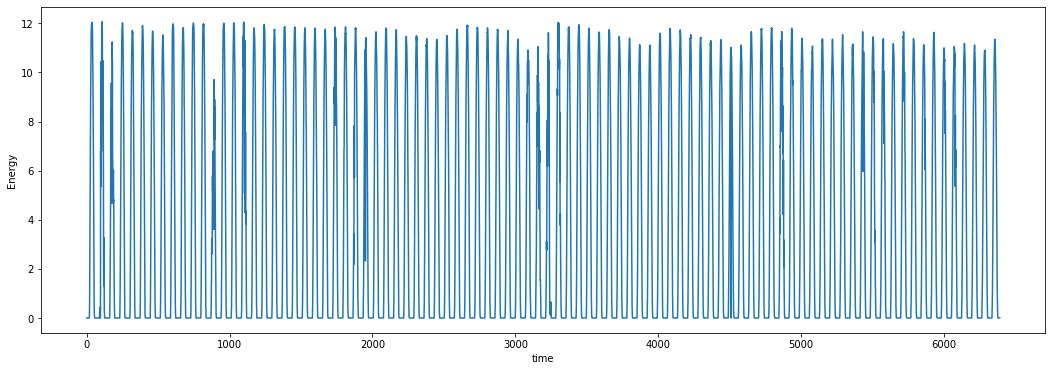

In [29]:
plt.figure(figsize=(18,6))
plt.plot(data[data.columns[:-1]].values.flatten())
plt.xlabel("time")
plt.ylabel("Energy")

In [30]:
data = data.drop(['Date'],axis=1)

In [31]:
data.shape

(90, 71)

In [32]:
data['23:40'] = data['23:00'].values

In [33]:
data.head()

00:00  00:20  00:40  01:00  01:20  01:40  02:00  02:20  02:40  03:00  ...  \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   

   20:40  21:00  21:20  21:40  22:00  22:20  22:40  23:00  23:20  23:40  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[5 rows x 72 columns]

In [34]:
data.shape

(90, 72)

In [35]:
total_days = 90
dx = np.array(temperature).reshape((total_days, 72)) ## temperature
dy = np.array(humidity).reshape((total_days,72))## humidity
dz = np.array(cloudCover).reshape(total_days,72)##cloud cover
dx1 = np.array(apptem).reshape((total_days, 72)) ## apperant temperature
dy1 = np.array(dew).reshape((total_days,72)) # dew point
dz1 = np.array(windspeed).reshape(total_days,72) # wind speed
bear = np.array(bearing).reshape(total_days,72) # wind bearing

In [36]:
dx.shape,dz.shape,dz1.shape

((90, 72), (90, 72), (90, 72))

In [37]:
cl = list(data.columns)

In [38]:
temperature = pd.DataFrame(dx,columns=cl)
humidity = pd.DataFrame(dy,columns=cl)
ccover = pd.DataFrame(dz,columns=cl)
apptem = pd.DataFrame(dx1,columns=cl)
dew = pd.DataFrame(dy1,columns=cl)
windspeed = pd.DataFrame(dz1,columns=cl)

In [39]:
windBearing = pd.DataFrame(bear,columns=cl)

In [40]:
temperature.shape,humidity.shape,ccover.shape,apptem.shape,data.shape

((90, 72), (90, 72), (90, 72), (90, 72), (90, 72))

In [41]:
windBearing.head()

00:00  00:20  00:40  01:00  01:20  01:40  02:00  02:20  02:40  03:00  ...  \
0     73     73     73    116    116    116     39     39     39     27  ...   
1      8      8      8     38     38     38     47     47     47     42  ...   
2    272    272    272    260    260    260    243    243    243    244  ...   
3      5      5      5    352    352    352    329    329    329    318  ...   
4    330    330    330    331    331    331    347    347    347    355  ...   

   20:40  21:00  21:20  21:40  22:00  22:20  22:40  23:00  23:20  23:40  
0     35     11     11     11     27     27     27     30     30     30  
1    202    251    251    251    309    309    309    307    307    307  
2    333    327    327    327    332    332    332    332    332    332  
3    301    299    299    299    334    334    334    349    349    349  
4      9     18     18     18     25     25     25     14     14     14  

[5 rows x 72 columns]

In [42]:
temperature.head()

00:00  00:20  00:40  01:00  01:20  01:40  02:00  02:20  02:40  03:00  ...  \
0  65.13  65.13  65.13  63.34  63.34  63.34  61.56  61.56  61.56  59.72  ...   
1  68.45  68.45  68.45  68.11  68.11  68.11  67.24  67.24  67.24  66.66  ...   
2  79.05  79.05  79.05  75.41  75.41  75.41  73.52  73.52  73.52  73.55  ...   
3  76.58  76.58  76.58  75.64  75.64  75.64  73.54  73.54  73.54  70.73  ...   
4  69.74  69.74  69.74  67.95  67.95  67.95  67.00  67.00  67.00  66.06  ...   

   20:40  21:00  21:20  21:40  22:00  22:20  22:40  23:00  23:20  23:40  
0  76.73  73.18  73.18  73.18  73.12  73.12  73.12  71.22  71.22  71.22  
1  85.26  83.51  83.51  83.51  81.71  81.71  81.71  79.97  79.97  79.97  
2  79.80  79.02  79.02  79.02  77.47  77.47  77.47  76.54  76.54  76.54  
3  77.00  75.35  75.35  75.35  73.20  73.20  73.20  71.48  71.48  71.48  
4  75.69  73.15  73.15  73.15  72.38  72.38  72.38  70.64  70.64  70.64  

[5 rows x 72 columns]

In [43]:
ccover.head()

00:00  00:20  00:40  01:00  01:20  01:40  02:00  02:20  02:40  03:00  ...  \
0   0.19   0.19   0.19   0.09   0.09   0.09   0.00   0.00   0.00   0.01  ...   
1   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.15  ...   
2   0.44   0.44   0.44   0.31   0.31   0.31   0.19   0.19   0.19   0.31  ...   
3   0.44   0.44   0.44   0.44   0.44   0.44   0.32   0.32   0.32   0.22  ...   
4   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00  ...   

   20:40  21:00  21:20  21:40  22:00  22:20  22:40  23:00  23:20  23:40  
0   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00  
1   0.55   0.40   0.40   0.40   0.29   0.29   0.29   0.29   0.29   0.29  
2   0.53   0.38   0.38   0.38   0.29   0.29   0.29   0.29   0.29   0.29  
3   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00  
4   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00  

[5 rows x 72 columns]

In [44]:
windspeed.head()

00:00  00:20  00:40  01:00  01:20  01:40  02:00  02:20  02:40  03:00  ...  \
0   2.86   2.86   2.86   1.81   1.81   1.81   3.04   3.04   3.04   5.57  ...   
1   2.66   2.66   2.66   4.72   4.72   4.72   5.35   5.35   5.35   4.45  ...   
2   5.92   5.92   5.92   5.76   5.76   5.76   5.01   5.01   5.01   5.07  ...   
3   1.01   1.01   1.01   2.12   2.12   2.12   3.06   3.06   3.06   4.18  ...   
4   1.44   1.44   1.44   1.44   1.44   1.44   1.99   1.99   1.99   3.07  ...   

   20:40  21:00  21:20  21:40  22:00  22:20  22:40  23:00  23:20  23:40  
0   2.69   2.11   2.11   2.11   3.87   3.87   3.87   3.88   3.88   3.88  
1   6.33   7.07   7.07   7.07   8.14   8.14   8.14   7.15   7.15   7.15  
2   3.22   2.41   2.41   2.41   3.28   3.28   3.28   3.07   3.07   3.07  
3   6.68   6.68   6.68   6.68   3.46   3.46   3.46   1.89   1.89   1.89  
4   1.21   1.22   1.22   1.22   2.95   2.95   2.95   3.62   3.62   3.62  

[5 rows x 72 columns]

In [45]:
dew.head()

00:00  00:20  00:40  01:00  01:20  01:40  02:00  02:20  02:40  03:00  ...  \
0  36.02  36.02  36.02  34.80  34.80  34.80  35.39  35.39  35.39  36.19  ...   
1  40.37  40.37  40.37  34.87  34.87  34.87  33.99  33.99  33.99  39.47  ...   
2  46.55  46.55  46.55  49.74  49.74  49.74  53.52  53.52  53.52  58.70  ...   
3  58.44  58.44  58.44  59.40  59.40  59.40  61.37  61.37  61.37  62.30  ...   
4  44.74  44.74  44.74  44.65  44.65  44.65  44.58  44.58  44.58  44.60  ...   

   20:40  21:00  21:20  21:40  22:00  22:20  22:40  23:00  23:20  23:40  
0  40.96  41.09  41.09  41.09  40.20  40.20  40.20  39.35  39.35  39.35  
1  41.83  44.00  44.00  44.00  50.38  50.38  50.38  47.93  47.93  47.93  
2  64.62  62.81  62.81  62.81  62.44  62.44  62.44  61.55  61.55  61.55  
3  44.80  44.78  44.78  44.78  45.58  45.58  45.58  45.61  45.61  45.61  
4  42.60  43.44  43.44  43.44  44.23  44.23  44.23  45.00  45.00  45.00  

[5 rows x 72 columns]

In [46]:
#temperature = temperature.drop(['23:40'],axis=1)
#humidity = humidity.drop(['23:40'],axis=1)
#ccover = ccover.drop(['23:40'],axis=1)
#dew = dew.drop(['23:40'],axis=1)
#apptem = apptem.drop(['23:40'],axis=1)
#ccover = ccover.drop(['23:40'],axis=1)

In [47]:
#wspeed  = windspeed.drop(['23:40'],axis=1)

In [48]:
#windBearing  = windBearing.drop(['23:40'],axis=1)

[]

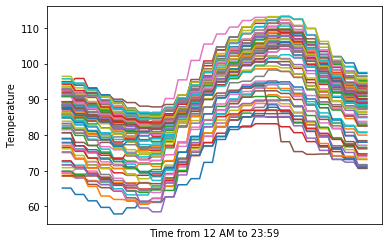

In [49]:
for d in temperature.values:
    plt.plot(d)
plt.xlabel("Time from 12 AM to 23:59")
plt.ylabel("Temperature")
plt.xticks([])
plt.plot()

[]

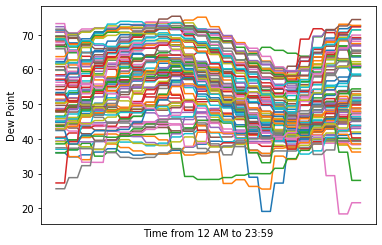

In [50]:
for d in dew.values:
    plt.plot(d)
plt.xlabel("Time from 12 AM to 23:59")
plt.ylabel("Dew Point")
plt.xticks([])
plt.plot()

### Taking reading from 6 am to 6 pm in the evening

In [51]:
temperature.head()

00:00  00:20  00:40  01:00  01:20  01:40  02:00  02:20  02:40  03:00  ...  \
0  65.13  65.13  65.13  63.34  63.34  63.34  61.56  61.56  61.56  59.72  ...   
1  68.45  68.45  68.45  68.11  68.11  68.11  67.24  67.24  67.24  66.66  ...   
2  79.05  79.05  79.05  75.41  75.41  75.41  73.52  73.52  73.52  73.55  ...   
3  76.58  76.58  76.58  75.64  75.64  75.64  73.54  73.54  73.54  70.73  ...   
4  69.74  69.74  69.74  67.95  67.95  67.95  67.00  67.00  67.00  66.06  ...   

   20:40  21:00  21:20  21:40  22:00  22:20  22:40  23:00  23:20  23:40  
0  76.73  73.18  73.18  73.18  73.12  73.12  73.12  71.22  71.22  71.22  
1  85.26  83.51  83.51  83.51  81.71  81.71  81.71  79.97  79.97  79.97  
2  79.80  79.02  79.02  79.02  77.47  77.47  77.47  76.54  76.54  76.54  
3  77.00  75.35  75.35  75.35  73.20  73.20  73.20  71.48  71.48  71.48  
4  75.69  73.15  73.15  73.15  72.38  72.38  72.38  70.64  70.64  70.64  

[5 rows x 72 columns]

In [52]:
temperature = (temperature.T.iloc[20:55]).T
humidity = (humidity.T.iloc[20:55]).T
energy = (data.T.iloc[20:55]).T
ccover = (ccover.T.iloc[20:55]).T
wspeed  = (windspeed.T.iloc[20:55]).T
dew  = (dew.T.iloc[20:55]).T
windBearing = (windBearing.T.iloc[20:55]).T

In [53]:
energy.shape,ccover.shape,wspeed.shape,windBearing.shape,dew.shape,humidity.shape,

((90, 35), (90, 35), (90, 35), (90, 35), (90, 35), (90, 35))

In [54]:
temperature.head()  #temperature data

06:40  07:00  07:20  07:40  08:00  08:20  08:40  09:00  09:20  09:40  ...  \
0  61.25  61.11  61.11  61.11  62.69  62.69  62.69  66.06  66.06  66.06  ...   
1  66.57  65.50  65.50  65.50  67.07  67.07  67.07  72.35  72.35  72.35  ...   
2  71.86  71.90  71.90  71.90  72.69  72.69  72.69  75.21  75.21  75.21  ...   
3  68.71  69.10  69.10  69.10  67.78  67.78  67.78  69.76  69.76  69.76  ...   
4  59.55  58.48  58.48  58.48  62.67  62.67  62.67  68.81  68.81  68.81  ...   

   15:00  15:20  15:40  16:00  16:20  16:40  17:00  17:20  17:40  18:00  
0  85.43  85.43  85.43  88.48  88.48  88.48  86.50  86.50  86.50  83.56  
1  93.23  93.23  93.23  93.09  93.09  93.09  93.03  93.03  93.03  91.32  
2  85.15  85.15  85.15  84.97  84.97  84.97  84.98  84.98  84.98  83.37  
3  83.16  83.16  83.16  83.15  83.15  83.15  82.31  82.31  82.31  80.65  
4  85.16  85.16  85.16  85.15  85.15  85.15  85.19  85.19  85.19  82.58  

[5 rows x 35 columns]

In [55]:
energy.head(5)  # energy data

06:40  07:00  07:20  07:40  08:00  08:20  08:40  09:00  09:20  09:40  ...  \
0  0.205  0.633  1.583  2.893  4.251  5.531  6.749  7.812  8.794  9.621  ...   
1  0.149  0.434  0.000  0.000  0.000  0.000  0.000  6.804  5.336  8.356  ...   
2  0.242  0.580  1.219  2.042  2.846  3.781  4.879  5.393  7.142  6.722  ...   
3  0.239  0.702  1.345  2.439  3.559  4.736  5.852  6.896  7.821  8.788  ...   
4  0.240  0.771  1.578  2.841  4.022  5.364  6.458  7.538  8.505  9.297  ...   

   15:00  15:20  15:40  16:00  16:20  16:40  17:00  17:20  17:40  18:00  
0  9.310  8.474  7.476  6.438  5.224  3.938  2.547  1.274  0.442  0.154  
1  8.270  7.342  5.512  2.050  1.288  3.272  1.997  0.804  0.328  0.072  
2  5.913  6.027  4.768  4.808  3.040  2.337  1.388  0.628  0.328  0.100  
3  9.222  8.400  7.531  6.374  5.074  3.814  2.402  1.236  0.436  0.146  
4  8.352  7.515  6.406  5.003  4.226  3.214  2.083  1.113  0.488  0.147  

[5 rows x 35 columns]

In [56]:
humidity.head()

06:40  07:00  07:20  07:40  08:00  08:20  08:40  09:00  09:20  09:40  ...  \
0   0.38   0.38   0.38   0.38   0.36   0.36   0.36   0.34   0.34   0.34  ...   
1   0.33   0.33   0.33   0.33   0.31   0.31   0.31   0.26   0.26   0.26  ...   
2   0.74   0.76   0.76   0.76   0.76   0.76   0.76   0.72   0.72   0.72  ...   
3   0.58   0.55   0.55   0.55   0.57   0.57   0.57   0.53   0.53   0.53  ...   
4   0.59   0.61   0.61   0.61   0.54   0.54   0.54   0.43   0.43   0.43  ...   

   15:00  15:20  15:40  16:00  16:20  16:40  17:00  17:20  17:40  18:00  
0   0.13   0.13   0.13   0.08   0.08   0.08   0.12   0.12   0.12   0.19  
1   0.23   0.23   0.23   0.24   0.24   0.24   0.22   0.22   0.22   0.20  
2   0.50   0.50   0.50   0.54   0.54   0.54   0.52   0.52   0.52   0.53  
3   0.26   0.26   0.26   0.25   0.25   0.25   0.26   0.26   0.26   0.28  
4   0.22   0.22   0.22   0.22   0.22   0.22   0.22   0.22   0.22   0.24  

[5 rows x 35 columns]

In [57]:
ccover.head()

06:40  07:00  07:20  07:40  08:00  08:20  08:40  09:00  09:20  09:40  ...  \
0   0.03   0.04   0.04   0.04   0.06   0.06   0.06   0.07   0.07   0.07  ...   
1   0.10   0.19   0.19   0.19   0.16   0.16   0.16   0.21   0.21   0.21  ...   
2   0.31   0.19   0.19   0.19   0.19   0.19   0.19   0.31   0.31   0.31  ...   
3   0.36   0.36   0.36   0.36   0.36   0.36   0.36   0.35   0.35   0.35  ...   
4   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00  ...   

   15:00  15:20  15:40  16:00  16:20  16:40  17:00  17:20  17:40  18:00  
0   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00  
1   0.44   0.44   0.44   0.44   0.44   0.44   0.59   0.59   0.59   0.75  
2   0.44   0.44   0.44   0.44   0.44   0.44   0.44   0.44   0.44   0.59  
3   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00  
4   0.19   0.19   0.19   0.09   0.09   0.09   0.00   0.00   0.00   0.00  

[5 rows x 35 columns]

In [58]:
dew.head()

06:40  07:00  07:20  07:40  08:00  08:20  08:40  09:00  09:20  09:40  ...  \
0  35.30  35.50  35.50  35.50  35.66  35.66  35.66  36.69  36.69  36.69  ...   
1  36.51  35.66  35.66  35.66  35.61  35.61  35.61  35.91  35.91  35.91  ...   
2  63.23  64.00  64.00  64.00  64.78  64.78  64.78  65.59  65.59  65.59  ...   
3  53.14  52.07  52.07  52.07  51.80  51.80  51.80  51.75  51.75  51.75  ...   
4  45.00  44.89  44.89  44.89  45.78  45.78  45.78  45.71  45.71  45.71  ...   

   15:00  15:20  15:40  16:00  16:20  16:40  17:00  17:20  17:40  18:00  
0  28.94  28.94  28.94  19.09  19.09  19.09  27.25  27.25  27.25  37.15  
1  50.36  50.36  50.36  51.34  51.34  51.34  48.71  48.71  48.71  44.39  
2  64.55  64.55  64.55  66.36  66.36  66.36  65.49  65.49  65.49  64.66  
3  44.69  44.69  44.69  43.86  43.86  43.86  43.88  43.88  43.88  44.77  
4  41.61  41.61  41.61  41.65  41.65  41.65  42.62  42.62  42.62  41.75  

[5 rows x 35 columns]

In [59]:
windBearing.head()

06:40  07:00  07:20  07:40  08:00  08:20  08:40  09:00  09:20  09:40  ...  \
0     36     45     45     45     49     49     49     54     54     54  ...   
1     70     70     70     70     79     79     79     89     89     89  ...   
2    241    231    231    231    236    236    236    246    246    246  ...   
3    312    305    305    305    302    302    302    313    313    313  ...   
4     42     42     42     42     40     40     40     41     41     41  ...   

   15:00  15:20  15:40  16:00  16:20  16:40  17:00  17:20  17:40  18:00  
0     94     94     94    100    100    100    103    103    103     82  
1    175    175    175    186    186    186    191    191    191    194  
2    277    277    277    319    319    319    333    333    333    340  
3    292    292    292    307    307    307    321    321    321    320  
4    237    237    237    237    237    237    317    317    317    322  

[5 rows x 35 columns]

In [60]:
energy.head()

06:40  07:00  07:20  07:40  08:00  08:20  08:40  09:00  09:20  09:40  ...  \
0  0.205  0.633  1.583  2.893  4.251  5.531  6.749  7.812  8.794  9.621  ...   
1  0.149  0.434  0.000  0.000  0.000  0.000  0.000  6.804  5.336  8.356  ...   
2  0.242  0.580  1.219  2.042  2.846  3.781  4.879  5.393  7.142  6.722  ...   
3  0.239  0.702  1.345  2.439  3.559  4.736  5.852  6.896  7.821  8.788  ...   
4  0.240  0.771  1.578  2.841  4.022  5.364  6.458  7.538  8.505  9.297  ...   

   15:00  15:20  15:40  16:00  16:20  16:40  17:00  17:20  17:40  18:00  
0  9.310  8.474  7.476  6.438  5.224  3.938  2.547  1.274  0.442  0.154  
1  8.270  7.342  5.512  2.050  1.288  3.272  1.997  0.804  0.328  0.072  
2  5.913  6.027  4.768  4.808  3.040  2.337  1.388  0.628  0.328  0.100  
3  9.222  8.400  7.531  6.374  5.074  3.814  2.402  1.236  0.436  0.146  
4  8.352  7.515  6.406  5.003  4.226  3.214  2.083  1.113  0.488  0.147  

[5 rows x 35 columns]

## converting temperature and energy in one column

In [61]:
tem,ene,hum,cloud = [],[],[],[]
for i in range(len(temperature.values)):
    for j in range(len(temperature.values[0])):
        tem.append(temperature.values[i][j])
for i in range(len(energy.values)):
    for j in range(len(energy.values[0])):
        ene.append(energy.values[i][j])
for i in range(len(humidity.values)):
    for j in range(len(humidity.values[0])):
        hum.append(humidity.values[i][j])
        
for i in range(len(ccover.values)):
    for j in range(len(ccover.values[0])):
        cloud.append(ccover.values[i][j])

In [62]:
windspeed = []
for i in range(len(wspeed.values)):
    for j in range(len(wspeed.values[0])):
        windspeed.append(wspeed.values[i][j])

In [63]:
dewpoint = []
for i in range(len(dew.values)):
    for j in range(len(dew.values[0])):
        dewpoint.append(dew.values[i][j])

In [64]:
wBearing = []
for i in range(len(windBearing.values)):
    for j in range(len(windBearing.values[0])):
        wBearing.append(windBearing.values[i][j])

In [65]:
len(ene),len(wBearing)

(3150, 3150)

## Energy Variation with Wind Bearing

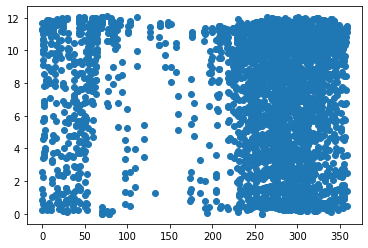

In [66]:
plt.scatter(wBearing,ene)

In [67]:
d = data1['Energy_t']

NameError: name 'data1' is not defined

([<matplotlib.axis.XTick at 0x22904baa630>,
 <a list of 29 Text xticklabel objects>)

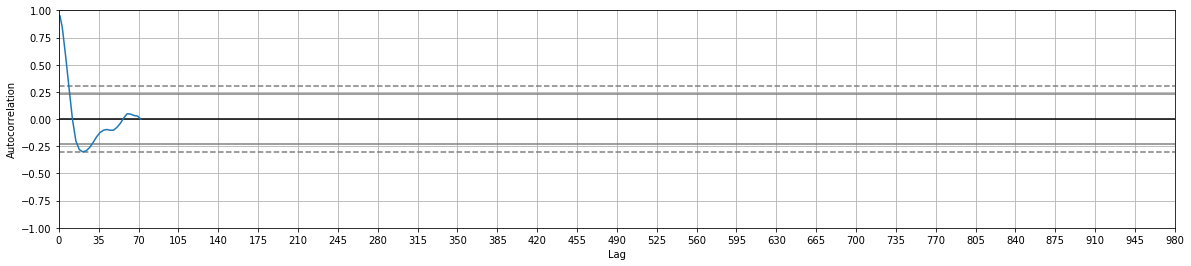

In [68]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(20,4))
#Out[102]: <Figure size 640x480 with 0 Axes>

spacing = np.linspace(-9 * np.pi, 9 * np.pi, num=1000)
#data = pd.Series(0.7 * np.random.rand(1000) + 0.3 * np.sin(spacing))

autocorrelation_plot(d)
plt.xticks(ticks=list(range(0, 1000,35)))
#Out[105]: <matplotlib.axes._subplots.AxesSubplot at 0x7f2463eb8250>

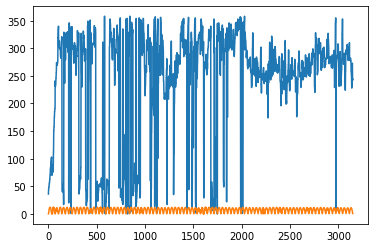

In [69]:
plt.plot(wBearing)
plt.plot(ene)

In [70]:
ene1 = np.array(ene).reshape(-1,1)
wBear = np.array(wBearing).reshape(-1,1)

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ene1 = scaler.fit_transform(ene1)
scaler1 = StandardScaler()
wBearing1 = scaler1.fit_transform(wBear)

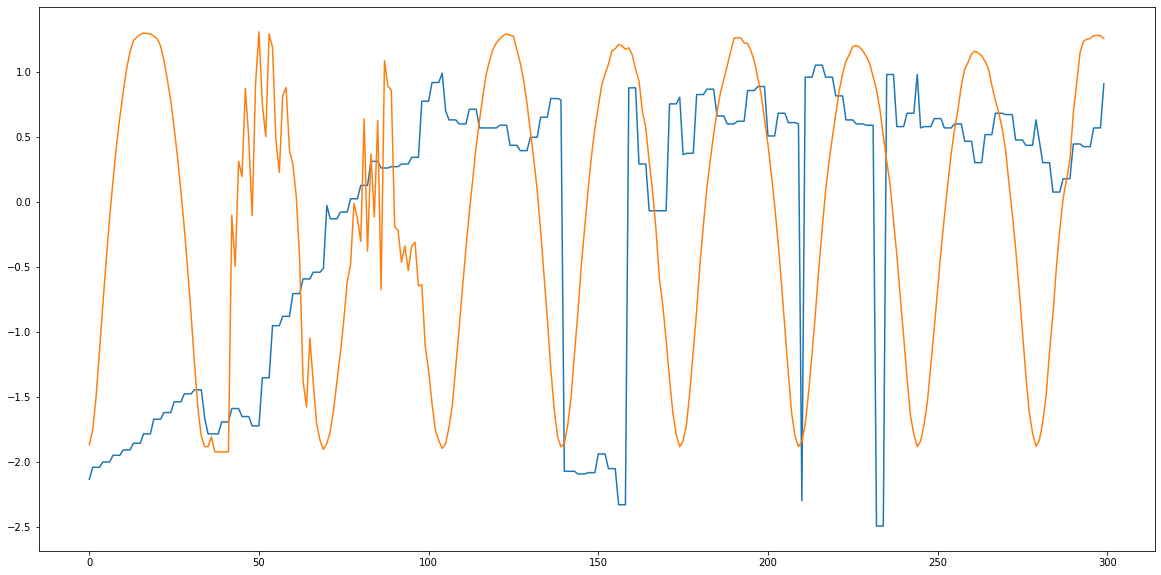

In [72]:
plt.figure(figsize = (20,10))
plt.plot(wBearing1[:300])
plt.plot(ene1[:300])

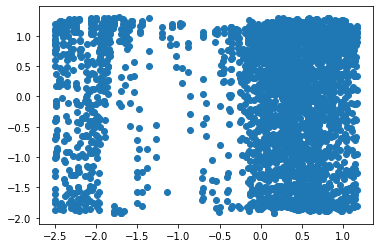

In [73]:
plt.scatter(wBearing1,ene1)

## Energy variation with dewPoint

Text(0.5, 1.0, 'Energy Variation with Wind Speed')

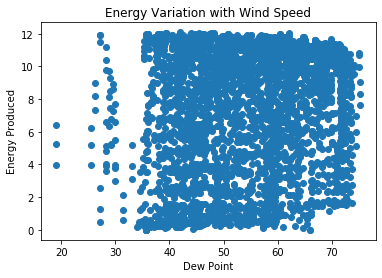

In [74]:
plt.scatter(dewpoint,ene)
plt.xlabel("Dew Point")
plt.ylabel("Energy Produced")
plt.title("Energy Variation with Wind Speed")

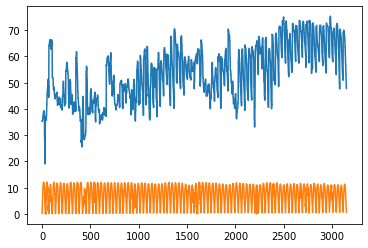

In [75]:
plt.plot(dewpoint)
plt.plot(ene)

In [76]:
from sklearn.preprocessing import StandardScaler
ene1 = np.array(ene).reshape(-1,1)
dpoint1 = np.array(dewpoint).reshape(-1,1)

scaler = StandardScaler()
ene1 = scaler.fit_transform(ene1)
scaler1 = StandardScaler()
dpoint1 = scaler1.fit_transform(dpoint1)

Text(0.5, 1.0, 'Energy variation with Dew Point')

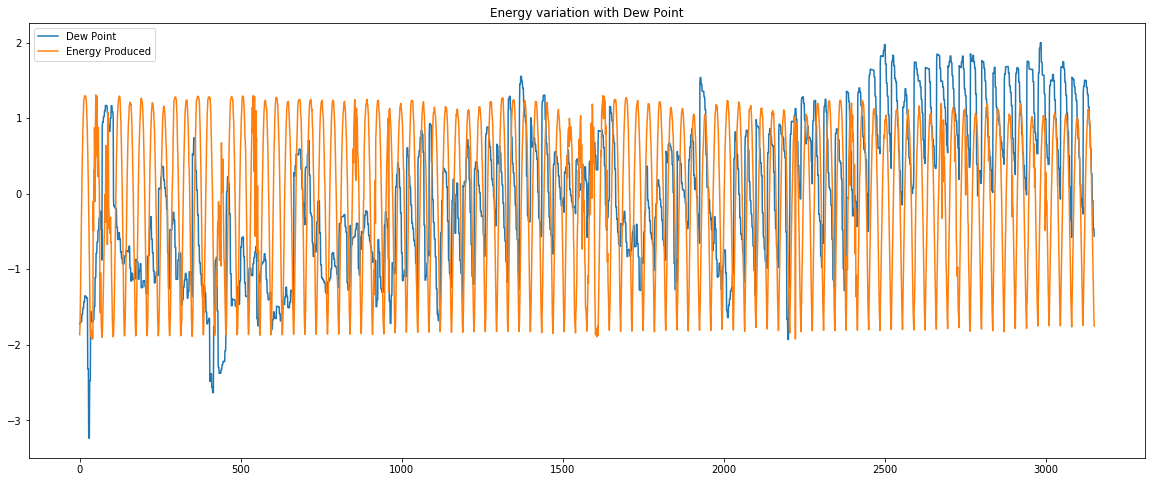

In [77]:
plt.figure(figsize =(20,8))
plt.plot(dpoint1)
plt.plot(ene1)
plt.legend(["Dew Point","Energy Produced"])
plt.title("Energy variation with Dew Point")

## Energy variation with wind speed 

Text(0.5, 1.0, 'Energy Variation with Wind Speed')

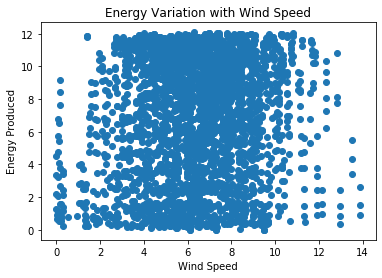

In [78]:
plt.scatter(windspeed,ene)
plt.xlabel("Wind Speed")
plt.ylabel("Energy Produced")
plt.title("Energy Variation with Wind Speed")

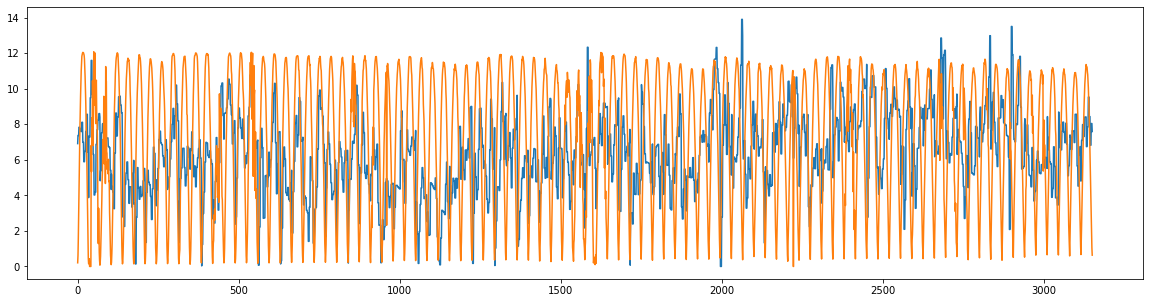

In [79]:
plt.figure(figsize = (20,5))
plt.plot(windspeed)
plt.plot(ene)

In [80]:
from sklearn.preprocessing import StandardScaler
ene1 = np.array(ene).reshape(-1,1)
windspeed1 = np.array(windspeed).reshape(-1,1)
scaler = StandardScaler()
ene1 = scaler.fit_transform(ene1)
scaler1 = StandardScaler()
windspeed1 = scaler1.fit_transform(windspeed1)

Text(0.5, 1.0, 'Energy variation with Dew Point')

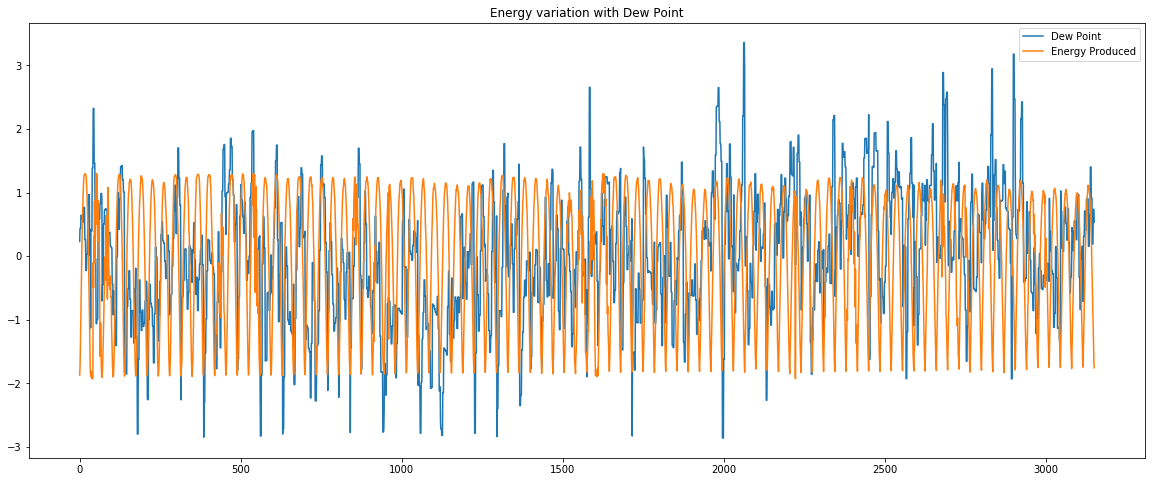

In [81]:
plt.figure(figsize =(20,8))
plt.plot(windspeed1)
plt.plot(ene1)
plt.legend(["Dew Point","Energy Produced"])
plt.title("Energy variation with Dew Point")

## Energy Variation with Cloud Cover

1. (0.985 − 0.984n^3.4)

In [82]:
len(ene)/30

105.0

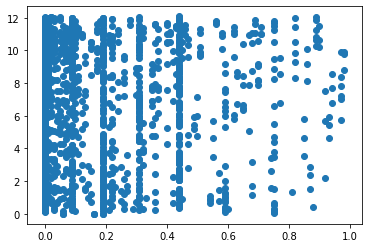

In [83]:
plt.scatter(cloud,ene)

In [84]:
c = 990*(1-0.75*(np.array(cloud)**3))

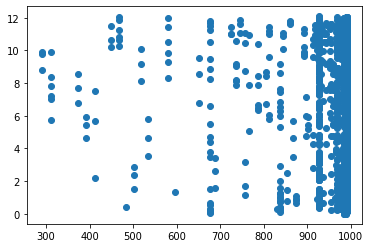

In [85]:
plt.scatter(c,ene)

Text(0.5, 1.0, 'Solar Radiation vs Cloud Cover')

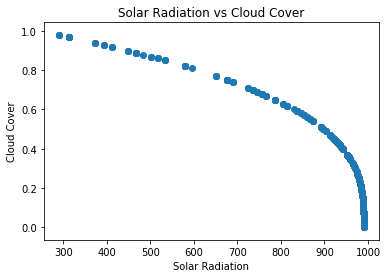

In [86]:
plt.scatter(c,cloud)
plt.xlabel("Solar Radiation")
plt.ylabel("Cloud Cover")
plt.title("Solar Radiation vs Cloud Cover")

In [87]:
c = []
for i in cloud:
    d = .985 - .984*(i**3.4)
    c.append(d)

In [88]:
len(c),len(ene)

(3150, 3150)

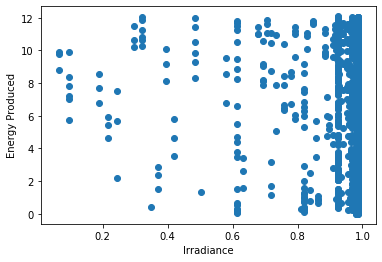

In [89]:
plt.scatter(c,ene)
plt.xlabel("Irradiance")
plt.ylabel("Energy Produced")
plt.show()

In [90]:
len(cloud)

3150

In [91]:
c = []
count = 0
d = 0
for i in cloud:
    if count ==35:
        c.append(d/35.0)
        d = 0
        count = 0
    count = count+1
        
    d = d + .985 - .984*(i**3.4)
    #c.append(d)

In [92]:
e = []
d = 0
count = 0
for i in ene:
    if count ==35:
        e.append(d)
        d = 0
        count = 0
    d = d+i
    count = count+1

In [93]:
len(e),len(c)

(89, 89)

Text(0.5, 0, 'Per Day Average Irradiance')

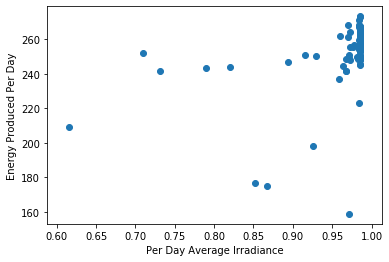

In [94]:
plt.scatter(c,e)
plt.ylabel("Energy Produced Per Day")
plt.xlabel("Per Day Average Irradiance")

In [95]:
data = pd.DataFrame(columns=['Temperature','Energy'])

In [96]:
data['Temperature'] = tem
data['Energy'] = ene

In [97]:
data.shape

(3150, 2)

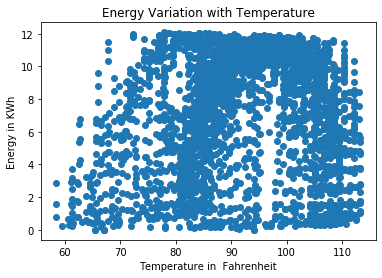

In [98]:
plt.scatter(data['Temperature'],data['Energy'])
plt.xlabel('Temperature in  Fahrenheit')
plt.ylabel("Energy in KWh")
plt.title("Energy Variation with Temperature")
plt.show()

### Applying svm model

X_train -> time , Y_train -> Energy 

In [99]:
data.head()

Temperature  Energy
0        61.25   0.205
1        61.11   0.633
2        61.11   1.583
3        61.11   2.893
4        62.69   4.251

In [100]:
data.shape

(3150, 2)

In [101]:
k = 40 ## number of time stamp

### Preparing data for modeling

<h5>X_train - > Temperature, Energy</h5>
<h5>Y_train -> Energy</h5>

In [102]:
x = data['Energy'].values[:len(data['Energy'].values)-k]  

In [103]:
x.shape

(3110,)

In [104]:
data1 = data.iloc[k:]

In [105]:
data1['Energy_t'] = x

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [106]:
data1.shape

(3110, 3)

In [107]:
np.corrcoef(data1['Energy'],data1['Energy_t'])   ## testing the correlation Actual value and predicted energy

array([[1.        , 0.54728275],
       [0.54728275, 1.        ]])

In [108]:
data1.head()

Temperature  Energy  Energy_t
40        67.07   0.000     0.205
41        67.07   0.000     0.633
42        72.35   6.804     1.583
43        72.35   5.336     2.893
44        72.35   8.356     4.251

In [109]:
data1.head()

Temperature  Energy  Energy_t
40        67.07   0.000     0.205
41        67.07   0.000     0.633
42        72.35   6.804     1.583
43        72.35   5.336     2.893
44        72.35   8.356     4.251

In [110]:
data.iloc[:5]

Temperature  Energy
0        61.25   0.205
1        61.11   0.633
2        61.11   1.583
3        61.11   2.893
4        62.69   4.251

In [111]:
day_reading = 35*65  ## 60 days reading as the train data
X_train = data1[['Temperature','Energy_t']].iloc[:day_reading]
X_test = data1[['Temperature','Energy_t']].iloc[day_reading:]
y_train = data1['Energy'].iloc[:day_reading]
y_test = data1['Energy'].iloc[day_reading:]

In [112]:
X_train.shape,X_test.shape

((2275, 2), (835, 2))

In [113]:
def create_train_test1(k,data1,day_reading):
    x = data1['Energy'].values[:len(data1['Energy'].values)-k]  
    data1 = data.iloc[k:]
    data1['Energy_t'] = x
    X_train = data1[['Temperature','Energy_t']].iloc[:day_reading]
    X_test = data1[['Temperature','Energy_t']].iloc[day_reading:]
    y_train = data1['Energy'].iloc[:day_reading]
    y_test = data1['Energy'].iloc[day_reading:]
    return [X_train,X_test,y_train,y_test]   

In [114]:
data1.shape

(3110, 3)

In [115]:
import warnings
warnings.filterwarnings('ignore')
X_train,X_test,y_train,y_test = create_train_test1(40,data,day_reading)

In [116]:
X_train.shape,X_test.shape

((2275, 2), (835, 2))

## Applying SVM

In [117]:
X_train.head()

Temperature  Energy_t
40        67.07     0.205
41        67.07     0.633
42        72.35     1.583
43        72.35     2.893
44        72.35     4.251

In [119]:
def absolute(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [102]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')
rmse1 = []
mape1 = []
rmse1_t = []
mape1_t = []
opt_v = 99999999
for k in range(1,42,5):
    X_train,X_test,y_train,y_test=create_train_test1(k,data,day_reading)
    reg = SVR(kernel='linear',gamma = 'auto',C=10)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    
    rmse1_t.append(m1)
    mape1_t.append(absolute(y_train.values,y_pred1))
    
    print("Root Mean For Lag Value:"+str(k)+'---->', math.sqrt(m))
    rmse1.append(math.sqrt(m))
    mape1.append(absolute(y_test.values,y_pred))
    print("MAPE using SVM :", absolute(y_test.values,y_pred))
    print("***************************************************")

Root Mean For Lag Value:1----> 0.6611788314001955
MAPE using SVM : 11.088400932244106
***************************************************
Root Mean For Lag Value:6----> 2.7314721541882965
MAPE using SVM : 90.39159851683021
***************************************************
Root Mean For Lag Value:11----> 3.306898468476011
MAPE using SVM : 128.9817155507485
***************************************************
Root Mean For Lag Value:16----> 1.902342988602365
MAPE using SVM : 73.83055956558836
***************************************************
Root Mean For Lag Value:21----> 2.202060052923511
MAPE using SVM : 54.91752602690442
***************************************************
Root Mean For Lag Value:26----> 4.217580852991703
MAPE using SVM : 169.20921663926995
***************************************************
Root Mean For Lag Value:31----> 2.2812139800657367
MAPE using SVM : 96.40610288985005
***************************************************
Root Mean For Lag Value:36----> 0.7795

[]

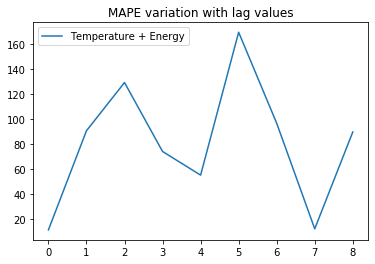

In [103]:
plt.plot(mape1)
#plt.plot(mape1_t)
plt.title("MAPE variation with lag values")
plt.legend(['Temperature + Energy'])
plt.plot()

[]

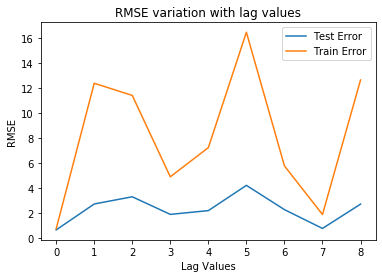

In [104]:
plt.plot(rmse1)
plt.plot(rmse1_t)
plt.title("RMSE variation with lag values")
plt.ylabel('RMSE')
plt.xlabel("Lag Values")
plt.legend(['Test Error','Train Error'])
plt.plot()

In [134]:
from sklearn.svm import SVR

# applying SVM over the data using rbf kernel
from sklearn.svm import SVR
opt_v = 99999
y_opt = []
for c in [.001,.01,.1,1,10,100,1000]:
    reg = SVR(kernel='linear',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred

Root Mean squared error using SVM on test data: 2.123174671759617
Root Mean squared error using SVM on test data: 2.1793360855739037
Root Mean squared error using SVM on test data: 2.1955238689135306
Root Mean squared error using SVM on test data: 2.1978505545751097
Root Mean squared error using SVM on test data: 2.1791017278302838
Root Mean squared error using SVM on test data: 2.2065670464968417
Root Mean squared error using SVM on test data: 2.019950895653968


In [162]:
""""from sklearn.svm import SVR

# applying SVM over the data using rbf kernel
from sklearn.svm import SVR
opt_v = 99999
y_opt = []


y_pred = np.array((list(mean_signal)*100)[:y_test.size])
y_pred1 = np.array((list(mean_signal)*100)[:y_train.size])
m = mean_squared_error(y_test,y_pred)
m1 = mean_squared_error(y_train,y_pred1)
print("Root Mean squared error using SVM on test data:", math.sqrt(m))
#print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
"""

'"from sklearn.svm import SVR\n\n# applying SVM over the data using rbf kernel\nfrom sklearn.svm import SVR\nopt_v = 99999\ny_opt = []\n\n\ny_pred = np.array((list(mean_signal)*100)[:y_test.size])\ny_pred1 = np.array((list(mean_signal)*100)[:y_train.size])\nm = mean_squared_error(y_test,y_pred)\nm1 = mean_squared_error(y_train,y_pred1)\nprint("Root Mean squared error using SVM on test data:", math.sqrt(m))\n#print("Root Mean squared error using SVM on train data:", math.sqrt(m1))\n'

In [377]:
def MAPE(y,yhat):
    d = 0
    for i in range(len(y)):
        d = d + abs(y[i]-yhat[i])/y[i]
    return (100*d)/len(y)

Mean squared error using SVM : 2.019950895653968
MAPE using SVM : 50.931655025545844


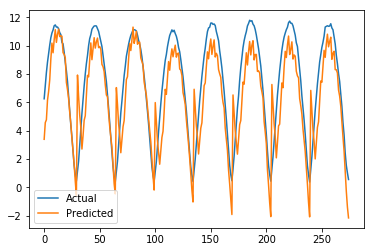

In [137]:
plt.plot(y_test.values)
plt.plot(y_pred)
plt.legend(["Actual","Predicted"])
print("Mean squared error using SVM :", opt_v)
#print("MAPE using SVM :", MAPE(y_test.values,y_opt))
print("MAPE using SVM :", MAPE(y_test.values,y_pred))

In [376]:

# applying SVM over the data using rbf kernel
from sklearn.svm import SVR
opt_v = 99999
y_opt = []
for c in [.001,.01,.1,1,10,100,1000]:
    reg = SVR(kernel='rbf',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred

Root Mean squared error using SVM on test data: 3.6477959908761948
Root Mean squared error using SVM on test data: 3.5391973802004424
Root Mean squared error using SVM on test data: 2.677063646136767
Root Mean squared error using SVM on test data: 1.3264469501526075
Root Mean squared error using SVM on test data: 1.269782885075345
Root Mean squared error using SVM on test data: 1.3029648559339835
Root Mean squared error using SVM on test data: 1.4263142205001413


Mean squared error using SVM : 1.269782885075345
MAPE using SVM : 28.979892840716694


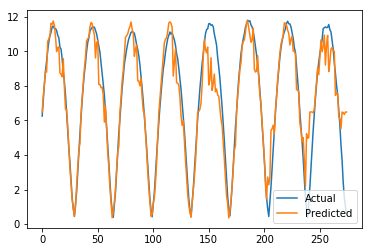

In [377]:
plt.plot(y_test.values)
plt.plot(y_opt)
plt.legend(["Actual","Predicted"])
print("Mean squared error using SVM :", opt_v)
print("MAPE using SVM :", MAPE(y_test.values,y_opt))

## Applying Nural Network

In [150]:
data.head()

Temperature  Energy  Predicted_Energy
0        84.88   0.706             1.366
1        84.65   1.366             2.404
2        84.65   2.404             3.546
3        84.65   3.546             4.682
4        85.29   4.682             5.748

In [151]:
train_data,test_data = data.drop(['Predicted_Energy','Energy'],axis=1).iloc[:750],data.drop(['Predicted_Energy','Energy'],axis=1).iloc[750:]
train_y,test_y = data['Predicted_Energy'].iloc[:750].values,data['Predicted_Energy'].iloc[750:].values

In [152]:
import tensorflow
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import np_utils  
import seaborn as sns
from keras import layers
from keras.initializers import RandomNormal
import random
import keras

In [557]:
#random.seed(40)
model = Sequential()
model.add(Dense(1, input_shape=(train_data.shape[1],), activation='sigmoid', kernel_initializer='lecun_uniform'))
model.add(Dense(64,activation = 'tanh'))
#model.add(layers.Dropout(0.2))

keras.regularizers.l1_l2(l1=0.01)
#model.add(Dense(64,activation = 'sigmoid'))
#model.add(layers.Dropout(0.2))

model.add(Dense(1,activation = 'relu'))
#model.add(Dense(1,activation = 'sigmoid'))
#model.add(Dense(1,activation = 'relu'))
#model.add(Dense(1))#,activation = 'sigmoid'))
#model.add(Dense(1,activation = 'relu'))
model.compile(optimizer=Adam(lr=0.01), loss='mean_squared_error')
model.fit(train_data, train_y, batch_size=100, epochs=1500, verbose=1)

Epoch 1/1500
750/750 [==============================] - 2s 2ms/step - loss: 48.0797
Epoch 2/1500
750/750 [==============================] - 0s 21us/step - loss: 23.6412
Epoch 3/1500
750/750 [==============================] - 0s 27us/step - loss: 14.1531
Epoch 4/1500
750/750 [==============================] - 0s 21us/step - loss: 15.2104
Epoch 5/1500
750/750 [==============================] - 0s 24us/step - loss: 14.1361
Epoch 6/1500
750/750 [==============================] - 0s 29us/step - loss: 13.7810
Epoch 7/1500
750/750 [==============================] - 0s 21us/step - loss: 13.7494
Epoch 8/1500
750/750 [==============================] - 0s 27us/step - loss: 13.6568
Epoch 9/1500
750/750 [==============================] - 0s 25us/step - loss: 13.6303
Epoch 10/1500
750/750 [==============================] - 0s 28us/step - loss: 13.6076
Epoch 11/1500
750/750 [==============================] - 0s 23us/step - loss: 13.6289
Epoch 12/1500
750/750 [==============================] - 0s 25us

In [153]:
train_data,test_data = data.drop(['Predicted_Energy'],axis=1).iloc[:750],data.drop(['Predicted_Energy'],axis=1).iloc[750:]
train_y,test_y = data['Predicted_Energy'].iloc[:750].values,data['Predicted_Energy'].iloc[750:].values

In [154]:
train_data,test_data = np.reshape(train_data.values, (-1, 1)),np.reshape(test_data.values,(-1,1))

In [548]:
#random.seed(40)
model = Sequential()
model.add(Dense(1, input_shape=(train_data.shape[1],), activation='sigmoid', kernel_initializer='lecun_uniform'))
model.add(Dense(64,activation = 'tanh'))
#model.add(layers.Dropout(0.2))

keras.regularizers.l1_l2(l1=0.01)
#model.add(Dense(64,activation = 'sigmoid'))
#model.add(layers.Dropout(0.2))

model.add(Dense(1,activation = 'relu'))
#model.add(Dense(1,activation = 'sigmoid'))
#model.add(Dense(1,activation = 'relu'))
#model.add(Dense(1))#,activation = 'sigmoid'))
#model.add(Dense(1,activation = 'relu'))
model.compile(optimizer=Adam(lr=0.01), loss='mean_squared_error')
model.fit(train_data, train_y, batch_size=100, epochs=1500, verbose=1)

Epoch 1/1500
750/750 [==============================] - 2s 2ms/step - loss: 58.0580
Epoch 2/1500
750/750 [==============================] - 0s 19us/step - loss: 32.8113
Epoch 3/1500
750/750 [==============================] - 0s 31us/step - loss: 14.4798
Epoch 4/1500
750/750 [==============================] - 0s 23us/step - loss: 15.6763
Epoch 5/1500
750/750 [==============================] - 0s 29us/step - loss: 13.8012
Epoch 6/1500
750/750 [==============================] - 0s 28us/step - loss: 13.9621
Epoch 7/1500
750/750 [==============================] - 0s 21us/step - loss: 13.6932
Epoch 8/1500
750/750 [==============================] - 0s 23us/step - loss: 13.6992
Epoch 9/1500
750/750 [==============================] - 0s 24us/step - loss: 13.6330
Epoch 10/1500
750/750 [==============================] - 0s 25us/step - loss: 13.6296
Epoch 11/1500
750/750 [==============================] - 0s 23us/step - loss: 13.6407
Epoch 12/1500
750/750 [==============================] - 0s 23us

Root mean Squared Error 0.247880342544376


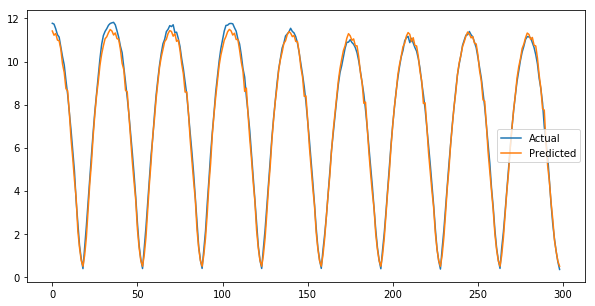

In [549]:
plt.figure(figsize=(10, 5))
y_pred = model.predict(test_data)
plt.plot(test_y)
plt.plot(y_pred)
plt.legend(["Actual","Predicted"])
print('Root mean Squared Error',math.sqrt(mean_squared_error(test_y,y_pred)))

Root mean Squared Error 0.4947847118155243


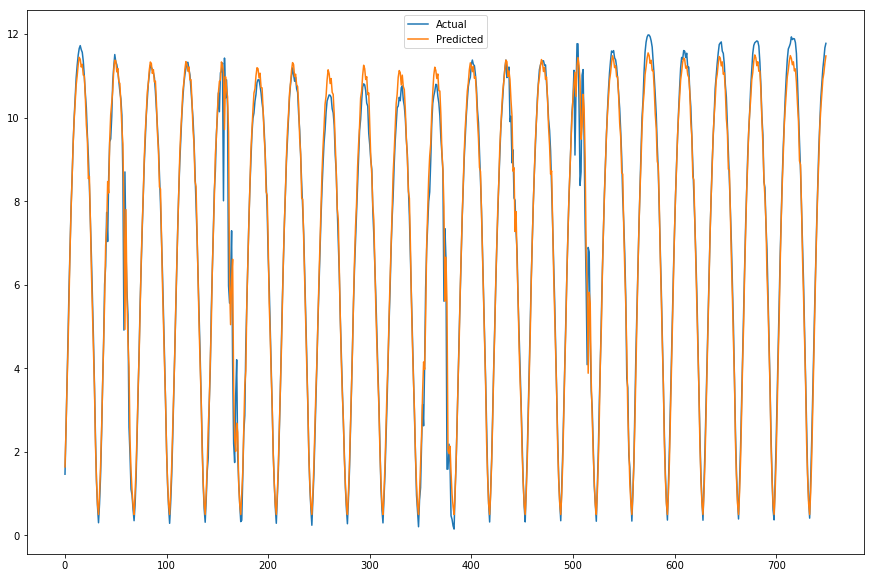

In [550]:
plt.figure(figsize=(15, 10))
y_pred = model.predict(train_data)
plt.plot(train_y)
plt.plot(y_pred)
plt.legend(["Actual","Predicted"])
print('Root mean Squared Error',math.sqrt(mean_squared_error(train_y,y_pred)))

### Using time of the Day, Energy and Temperature for prediction

<h5>X_train -> Time, Energy, Temperature</h5>

<h5>Y_train -> Predicted_Energy</h5>

In [120]:
time = []
for i in range(0,90):
    for j in energy.columns:
        time.append(j)

In [121]:
data.head()

Temperature  Energy
0        61.25   0.205
1        61.11   0.633
2        61.11   1.583
3        61.11   2.893
4        62.69   4.251

In [122]:
from sklearn.preprocessing import OneHotEncoder
def create_train_test(k,data,time):
    #time = []
    #print(data.shape)
    #for i in range(0,90):
    #    for j in energy.columns:
    #        time.append(j)
    data['Time'] = time
    x = data['Energy'].values[:len(data['Energy'].values)-k]  
    data = data.iloc[k:]
    data['Energy_t'] = x
    #print(data)
    enc = OneHotEncoder(handle_unknown='ignore')
    enc.fit(data['Time'].values.reshape(-1,1))
    X = enc.transform(data['Time'].values.reshape(-1,1))
    #print(data)
   
    data.reset_index(drop=True, inplace=True)
    day_d = pd.DataFrame(X.todense())
    day_d.reset_index(drop=True, inplace=True)
    #print(day_d.shape)
    data = pd.concat([data,day_d],axis=1)
    #print(data)
    data = data.drop(['Time'],axis=1)
    
    train = data.iloc[:day_reading]
    
    test = data.iloc[day_reading:]
    X_train = train.drop(['Energy'],axis=1)
    y_train = train['Energy']
    X_test = test.drop(['Energy'],axis=1)
    y_test = test['Energy']
    return [X_train,X_test,y_train,y_test]

In [123]:
X_train,X_test,y_train,y_test=create_train_test(40,data,time)

In [124]:
data.shape

(3150, 3)

In [125]:
X_train.shape,X_test.shape

((2275, 37), (835, 37))

In [126]:
X_train,X_test,y_train,y_test=create_train_test(1,data,time)

In [127]:
X_train.shape,X_test.shape

((2275, 37), (874, 37))

In [130]:
from sklearn.svm import SVR
rmse2 = []
mape2 = []
rmse2_t = []
mape2_t = []
for k in range(1,42,5):
    X_train,X_test,y_train,y_test=create_train_test(k,data,time)
    reg = SVR(kernel='linear',gamma = 'auto',C=10)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    
    
    
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    
    rmse2_t.append(m1)
    mape2_t.append(absolute(y_train.values,y_pred1))
    print("Root Mean For Lag Value:"+str(k)+'---->', math.sqrt(m))
    rmse2.append(math.sqrt(m))
    mape2.append(absolute(y_test.values,y_pred))
    print("MAPE using SVM :", absolute(y_test.values,y_pred))
    print("***************************************************")

Root Mean For Lag Value:1----> 0.5249184592818341
MAPE using SVM : 5.348563628072681
***************************************************
Root Mean For Lag Value:6----> 0.6991369248101862
MAPE using SVM : 12.579941634959269
***************************************************
Root Mean For Lag Value:11----> 0.7374439586460331
MAPE using SVM : 12.110958372593908
***************************************************
Root Mean For Lag Value:16----> 0.7224579121953401
MAPE using SVM : 11.129191944617295
***************************************************
Root Mean For Lag Value:21----> 0.715965658209519
MAPE using SVM : 11.073362048389196
***************************************************
Root Mean For Lag Value:26----> 0.7166774351237511
MAPE using SVM : 10.560102795660516
***************************************************
Root Mean For Lag Value:31----> 0.6757801712790001
MAPE using SVM : 9.523437463435268
***************************************************
Root Mean For Lag Value:36----> 

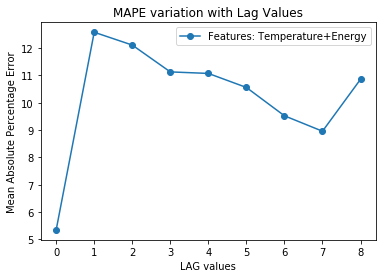

In [132]:
#plt.plot(mape1,marker='o')
plt.plot(mape2,marker='o')
plt.title('MAPE variation with Lag Values')
plt.xlabel('LAG values')
plt.ylabel('Mean Absolute Percentage Error')
plt.legend(['Features: Temperature+Energy','Features: Temperature + Time + Energy'])

[]

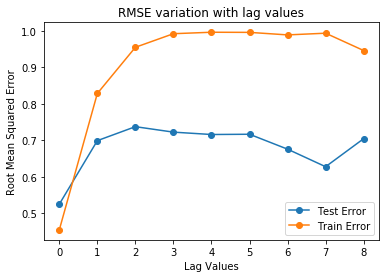

In [133]:
plt.plot(rmse2,marker='o')
plt.plot(rmse2_t,marker='o')
plt.title("RMSE variation with lag values")
plt.legend(['Test Error','Train Error'])
plt.xlabel('Lag Values')
plt.ylabel('Root Mean Squared Error')
plt.plot()

[]

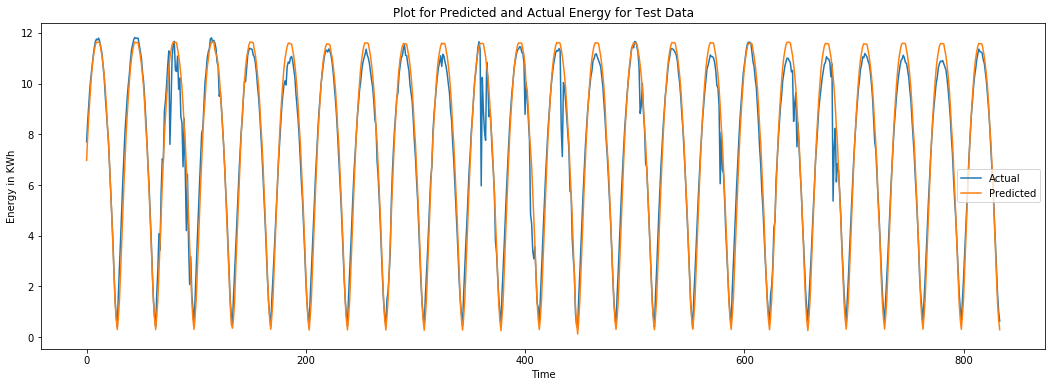

In [309]:
plt.figure(figsize=(18,6))
plt.plot(y_test.values)
plt.plot(y_pred)
plt.title("Plot for Predicted and Actual Energy for Test Data")
plt.legend(["Actual","Predicted"])
plt.ylabel("Energy in KWh")
plt.xlabel("Time")
plt.plot()

[]

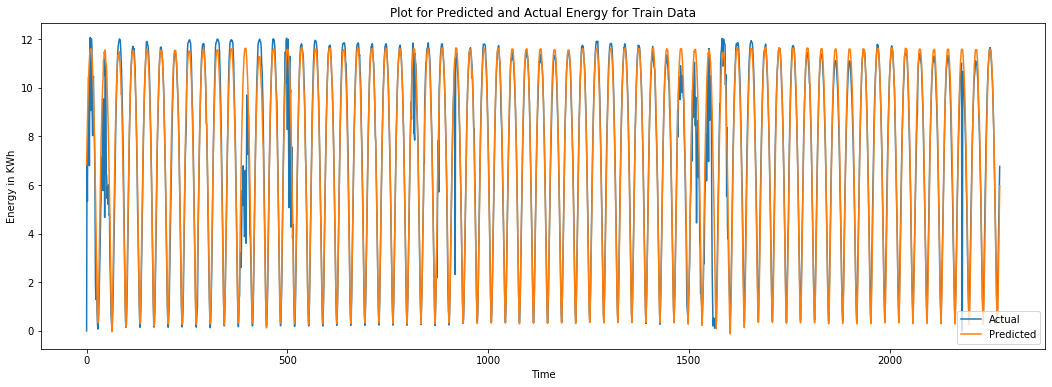

In [310]:
plt.figure(figsize=(18,6))
plt.plot(y_train.values)
plt.plot(y_pred1)
plt.legend(["Actual","Predicted"])
plt.ylabel("Energy in KWh")
plt.title("Plot for Predicted and Actual Energy for Train Data")
plt.xlabel("Time")
plt.plot()

### Applying SVM

## Using Temperature, Time, Previous Energy Produced, Humidity 
<h5>X_train -> Temperature, Time, Humidity</h5>
<h5>Y_train -> Energy</h5>

In [134]:
data['humidity']  = hum#hum[:len(hum)-k]

In [135]:
data.shape

(3150, 4)

In [136]:
data.head()

Temperature  Energy   Time  humidity
0        61.25   0.205  06:40      0.38
1        61.11   0.633  07:00      0.38
2        61.11   1.583  07:20      0.38
3        61.11   2.893  07:40      0.38
4        62.69   4.251  08:00      0.36

In [137]:
from sklearn.preprocessing import OneHotEncoder
def create_train_test(k,data,time):
    x = data['Energy'].values[:len(data['Energy'].values)-k]  
    data = data.iloc[k:]
    data['Energy_t'] = x
    enc = OneHotEncoder(handle_unknown='ignore')
    enc.fit(data['Time'].values.reshape(-1,1))
    X = enc.transform(data['Time'].values.reshape(-1,1))
   
    data.reset_index(drop=True, inplace=True)
    day_d = pd.DataFrame(X.todense())
    day_d.reset_index(drop=True, inplace=True)
    #print(day_d.shape)
    data = pd.concat([data,day_d],axis=1)
    #print(data)
    data = data.drop(['Time'],axis=1)
    
    train = data.iloc[:day_reading]
    
    test = data.iloc[day_reading:]
    X_train = train.drop(['Energy'],axis=1)
    y_train = train['Energy']
    X_test = test.drop(['Energy'],axis=1)
    y_test = test['Energy']
    return [X_train,X_test,y_train,y_test]

In [138]:
X_train,X_test,y_train,y_test=create_train_test(40,data,time)

In [139]:
X_train.head()

Temperature  humidity  Energy_t    0    1    2    3    4    5    6  ...  \
0        67.07      0.31     0.205  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...   
1        67.07      0.31     0.633  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...   
2        72.35      0.26     1.583  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
3        72.35      0.26     2.893  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
4        72.35      0.26     4.251  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

    25   26   27   28   29   30   31   32   33   34  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 38 columns]

In [140]:
data.head()

Temperature  Energy   Time  humidity
0        61.25   0.205  06:40      0.38
1        61.11   0.633  07:00      0.38
2        61.11   1.583  07:20      0.38
3        61.11   2.893  07:40      0.38
4        62.69   4.251  08:00      0.36

In [141]:
rmse3 = []
mape3 = []
rmse3_t = []
mape3_t = []
for k in range(1,42,5):
    X_train,X_test,y_train,y_test=create_train_test(k,data,time)
    reg = SVR(kernel='linear',gamma = 'auto',C=10)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    
    rmse3_t.append(m1)
    mape3_t.append(absolute(y_train.values,y_pred1))
    
    print("Root Mean For Lag Value:"+str(k)+'---->', math.sqrt(m))
    rmse3.append(math.sqrt(m))
    mape3.append(absolute(y_test.values,y_pred))
    print("MAPE using SVM :", absolute(y_test.values,y_pred))
    print("***************************************************")

Root Mean For Lag Value:1----> 0.5231517563091443
MAPE using SVM : 5.366733641477639
***************************************************
Root Mean For Lag Value:6----> 0.7018113799857958
MAPE using SVM : 12.890048202793668
***************************************************
Root Mean For Lag Value:11----> 0.7326142775924838
MAPE using SVM : 12.127464948687654
***************************************************
Root Mean For Lag Value:16----> 0.7169350549003626
MAPE using SVM : 11.446815027876672
***************************************************
Root Mean For Lag Value:21----> 0.7181902251005348
MAPE using SVM : 10.910623438906402
***************************************************
Root Mean For Lag Value:26----> 0.7121596075524079
MAPE using SVM : 11.057901600626744
***************************************************
Root Mean For Lag Value:31----> 0.6791866028054414
MAPE using SVM : 9.72415844604293
***************************************************
Root Mean For Lag Value:36----> 

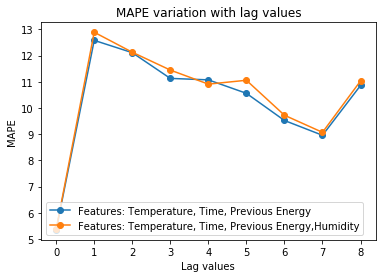

In [116]:
plt.plot(mape2,marker='o')
plt.plot(mape3,marker='o')
plt.title("MAPE variation with lag values")
plt.legend(['Features: Temperature, Time, Previous Energy','Features: Temperature, Time, Previous Energy,Humidity'])
plt.xlabel('Lag values')
plt.ylabel('MAPE')
plt.show()

[]

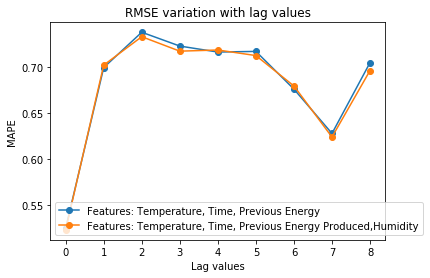

In [117]:
plt.plot(rmse2,marker='o')
plt.plot(rmse3,marker ='o')
plt.title("RMSE variation with lag values")
plt.legend(['Features: Temperature, Time, Previous Energy','Features: Temperature, Time, Previous Energy Produced,Humidity'])
plt.xlabel('Lag values')
plt.ylabel('MAPE')
plt.plot()

[]

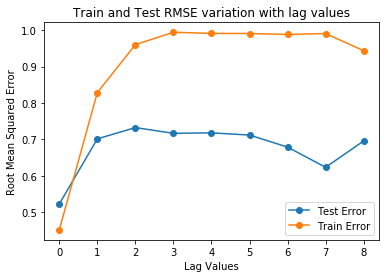

In [118]:
plt.plot(rmse3,marker='o')
plt.plot(rmse3_t,marker='o')
plt.title("Train and Test RMSE variation with lag values")
plt.legend(['Test Error','Train Error'])
plt.xlabel('Lag Values')
plt.ylabel('Root Mean Squared Error')
plt.plot()

In [210]:
X_train,X_test,y_train,y_test=create_train_test(40,data,time,hum)

In [211]:
X_train.head()

Temperature  Energy  humidity    0    1    2    3    4    5    6  ...   25  \
0        84.90   0.706      0.50  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
1        84.65   1.366      0.49  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
2        84.65   2.404      0.49  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0   
3        84.65   3.546      0.49  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0   
4        85.30   4.682      0.48  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0   

    26   27   28   29   30   31   32   33   34  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 38 columns]

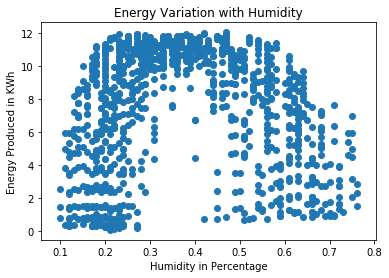

In [405]:
plt.scatter(data['humidity'],data['Energy'])
plt.xlabel("Humidity in Percentage")
plt.ylabel("Energy Produced in KWh")
plt.title("Energy Variation with Humidity")
plt.show()

In [406]:
X_train = data.drop(['Predicted_Energy'],axis=1).iloc[:day_reading]
y_train = data['Predicted_Energy'].iloc[:day_reading]
X_test = data.drop(['Predicted_Energy'],axis=1).iloc[day_reading:]
y_test = data['Predicted_Energy'].iloc[day_reading:]

In [407]:
X_train.head()

Temperature  Energy    0    1    2    3    4    5    6    7  ...   26   27  \
0        84.88   0.706  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1        84.65   1.366  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2        84.65   2.404  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3        84.65   3.546  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4        85.29   4.682  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0   

    28   29   30   31   32   33   34  humidity  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.51  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.49  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.49  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.49  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.48  

[5 rows x 38 columns]

In [408]:
opt_v = 99999
y_opt = []
for c in [.001,.01,.1,1,10,100,1000]:
    reg = SVR(kernel='rbf',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred

Root Mean squared error using SVM on test data: 3.573579226721154
Root Mean squared error using SVM on test data: 2.858598737876792
Root Mean squared error using SVM on test data: 1.2830499953990504
Root Mean squared error using SVM on test data: 0.7063744697175908
Root Mean squared error using SVM on test data: 0.4774050163162934
Root Mean squared error using SVM on test data: 0.3714079649065828
Root Mean squared error using SVM on test data: 0.5729182791374937


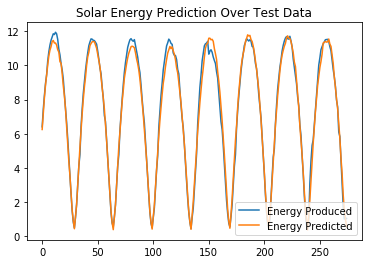

Optimal Result of the model : 0.3714079649065828
MAPE using SVM : 5.572162955735272


In [409]:
plt.plot(y_opt)
plt.plot(y_test.values)
plt.legend(["Energy Produced","Energy Predicted"])
plt.title("Solar Energy Prediction Over Test Data")
plt.show()
print("Optimal Result of the model :", opt_v)
print("MAPE using SVM :", MAPE(y_test.values,y_opt))

In [410]:
opt_v = 99999
y_opt = []
for c in [.001,.01,.1,1,10,100,1000]:
    reg = SVR(kernel='linear',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred

Root Mean squared error using SVM on test data: 1.706238050494947
Root Mean squared error using SVM on test data: 1.7432230768530084
Root Mean squared error using SVM on test data: 1.127962332473021
Root Mean squared error using SVM on test data: 0.3724483987318123
Root Mean squared error using SVM on test data: 0.2751278043738191
Root Mean squared error using SVM on test data: 0.30491394356896456
Root Mean squared error using SVM on test data: 2.4878011166873124


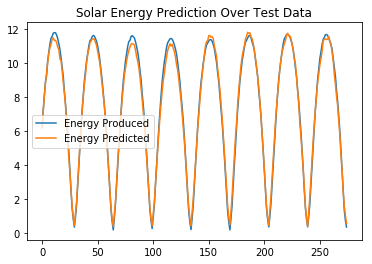

Optimal Result of the model : 0.2751278043738191
MAPE using SVM : 5.482006445822351


In [411]:
plt.plot(y_opt)
plt.plot(y_test.values)
plt.legend(["Energy Produced","Energy Predicted"])
plt.title("Solar Energy Prediction Over Test Data")
plt.show()
print("Optimal Result of the model :", opt_v)
print("MAPE using SVM :", MAPE(y_test.values,y_opt))

In [414]:
from sklearn.svm import SVR

# applying SVM over the data using rbf kernel
from sklearn.svm import SVR
opt_v = 99999
y_opt = []
for c in [.001,.01,.1,1,10,100,1000]:
    reg = SVR(kernel='poly',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred
print("Mean squared error using SVM on Test:", opt_v)

Root Mean squared error using SVM on test data: 0.4286305481186575
Root Mean squared error using SVM on test data: 0.4233831629565547
Root Mean squared error using SVM on test data: 0.6440017516152898
Root Mean squared error using SVM on test data: 4.819497266459673
Root Mean squared error using SVM on test data: 46.42268283303288
Root Mean squared error using SVM on test data: 630.3992481834886
Root Mean squared error using SVM on test data: 5206.1966188016395
Mean squared error using SVM on Test: 0.4233831629565547


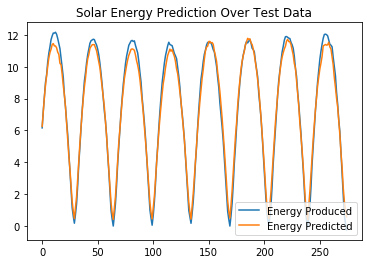

Mean squared error using SVM on Test: 0.4233831629565547
MAPE using SVM : 11.325466067183829


In [415]:
plt.plot(y_opt)
plt.plot(y_test.values)
plt.legend(["Energy Produced","Energy Predicted"])
plt.title("Solar Energy Prediction Over Test Data")
plt.show()
print("Mean squared error using SVM on Test:", opt_v)
print("MAPE using SVM :", MAPE(y_test.values,y_opt))

In [417]:
data.head()

Temperature  Energy  Predicted_Energy    0    1    2    3    4    5    6  \
0        84.88   0.706             5.847  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
1        84.65   1.366             6.792  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
2        84.65   2.404             7.541  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
3        84.65   3.546             8.396  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
4        85.29   4.682             9.002  0.0  0.0  0.0  0.0  1.0  0.0  0.0   

   ...   26   27   28   29   30   31   32   33   34  humidity  
0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.51  
1  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.49  
2  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.49  
3  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.49  
4  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.48  

[5 rows x 39 columns]

## Time, Humidity, Temperature

In [142]:
data.head()

Temperature  Energy   Time  humidity
0        61.25   0.205  06:40      0.38
1        61.11   0.633  07:00      0.38
2        61.11   1.583  07:20      0.38
3        61.11   2.893  07:40      0.38
4        62.69   4.251  08:00      0.36

In [143]:
from sklearn.preprocessing import OneHotEncoder
def create_train_test(k,data,time):
    x = data['Energy'].values[:len(data['Energy'].values)-k]  
    data = data.iloc[k:]
    data['Energy_t'] = x
    enc = OneHotEncoder(handle_unknown='ignore')
    enc.fit(data['Time'].values.reshape(-1,1))
    X = enc.transform(data['Time'].values.reshape(-1,1))
    data.reset_index(drop=True, inplace=True)
    day_d = pd.DataFrame(X.todense())
    day_d.reset_index(drop=True, inplace=True)
    data = pd.concat([data,day_d],axis=1)
    data = data.drop(['Time'],axis=1)
    
    train = data.iloc[:day_reading]
    
    test = data.iloc[day_reading:]
    X_train = train.drop(['Energy','Energy_t'],axis=1)
    y_train = train['Energy']
    X_test = test.drop(['Energy','Energy_t'],axis=1)
    y_test = test['Energy']
    return [X_train,X_test,y_train,y_test]

In [144]:
 X_train,X_test,y_train,y_test=create_train_test(k,data,time)

In [145]:
X_train.head()

Temperature  humidity    0    1    2    3    4    5    6    7  ...   25  \
0        67.07      0.31  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0   
1        72.35      0.26  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0   
2        72.35      0.26  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
3        72.35      0.26  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
4        74.23      0.27  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   

    26   27   28   29   30   31   32   33   34  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 37 columns]

In [ ]:
rmse4 =  []
mape4 =  []
rmse4_t = []
mape4_t = []
for k in range(1,42,5):
    X_train,X_test,y_train,y_test=create_train_test(k,data,time)
    reg = SVR(kernel='linear',gamma = 'auto',C=10)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    
    rmse4_t.append(m1)
    mape4_t.append(absolute(y_train.values,y_pred1))
    
    
    print("Root Mean For Lag Value:"+str(k)+'---->', math.sqrt(m))
    rmse4.append(math.sqrt(m))
    mape4.append(absolute(y_test.values,y_pred))
    print("MAPE using SVM :", absolute(y_test.values,y_pred))
    print("***************************************************")

In [ ]:
plt.plot(mape2,marker='o')
plt.plot(mape3,marker='o')
plt.plot(mape4,marker='o')
plt.title("MAPE variation with lag values")
plt.legend(['Features: Temperature, Time, Previous Energy','Features: Temperature, Time, Previous Energy,Humidity','Features: Time , Humidity, Temperature'])
plt.xlabel('Lag values')
plt.ylabel('MAPE')
plt.show()

In [ ]:
plt.plot(rmse2,marker='o')
plt.plot(rmse3,marker ='o')
plt.plot(rmse4,marker='o')
plt.title("RMSE variation with lag values")
plt.legend(['Temperature, Time, Previous Energy','Temperature, Time, Previous Energy Produced,Humidity','Time, Humidity, Temperature'])
plt.xlabel('Lag values')
plt.ylabel('MAPE')
plt.plot()

In [ ]:
plt.plot(rmse4,marker='o')
plt.plot(rmse4_t,marker='o')
plt.title("Train and Test RMSE Variation with Lag Values")
plt.legend(['Test Error','Train Error'])
plt.xlabel('Lag Values')
plt.ylabel('Root Mean Squared Error')
plt.plot()

In [418]:
X_train = data.drop(['Predicted_Energy','Energy'],axis=1).iloc[:day_reading]
y_train = data['Predicted_Energy'].iloc[:day_reading]
X_test = data.drop(['Predicted_Energy','Energy'],axis=1).iloc[day_reading:]
y_test = data['Predicted_Energy'].iloc[day_reading:]

In [419]:
# applying SVM over the data using rbf kernel
from sklearn.svm import SVR
opt_v = 99999
y_opt = []
for c in [.001,.01,.1,1,10,100,1000]:
    reg = SVR(kernel='rbf',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred

Root Mean squared error using SVM on test data: 3.5578842286358694
Root Mean squared error using SVM on test data: 2.913806398335176
Root Mean squared error using SVM on test data: 2.3785295629995145
Root Mean squared error using SVM on test data: 2.20394532322695
Root Mean squared error using SVM on test data: 0.9137827275821117
Root Mean squared error using SVM on test data: 0.4620481714265496
Root Mean squared error using SVM on test data: 0.570263045111786


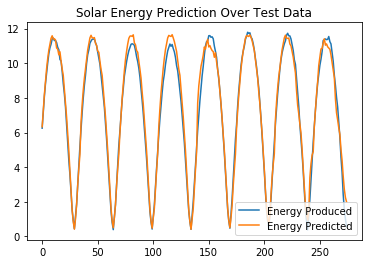

Mean squared error using SVM : 0.4620481714265496
MAPE using SVM : 8.211797609664142


In [420]:
plt.plot(y_test.values)
plt.plot(y_opt)
plt.legend(["Energy Produced","Energy Predicted"])
plt.title("Solar Energy Prediction Over Test Data")
plt.show()
#m = mean_squared_error(y_test,y_pred)
print("Mean squared error using SVM :", opt_v)
print("MAPE using SVM :", MAPE(y_test.values,y_opt))

In [424]:
# applying SVM over the data using rbf kernel
from sklearn.svm import SVR
opt_v = 99999
y_opt = []
for c in [.01,.1,1,10,100]:
    reg = SVR(kernel='linear',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred

Root Mean squared error using SVM on test data: 2.602378658762899
Root Mean squared error using SVM on test data: 1.5203360079199453
Root Mean squared error using SVM on test data: 0.34500776721529774
Root Mean squared error using SVM on test data: 0.30897827232845476
Root Mean squared error using SVM on test data: 0.49778168281533175


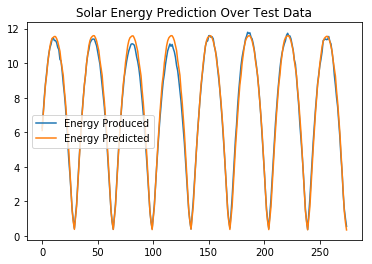

Mean squared error using SVM : 0.30897827232845476
MAPE using SVM : 4.418240972520006


In [425]:
plt.plot(y_test.values)
plt.plot(y_opt)
plt.legend(["Energy Produced","Energy Predicted"])
plt.title("Solar Energy Prediction Over Test Data")
plt.show()
#m = mean_squared_error(y_test,y_pred)
print("Mean squared error using SVM :", opt_v)
print("MAPE using SVM :", MAPE(y_test.values,y_opt))

## Applying VAR Model

In [215]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.var_model import VAR
%matplotlib inline

In [217]:
#johan_test_temp = data
#coint_johansen(johan_test_temp,-1,1).eig

1. From the above result we can see that eigen values are less then 1 so our data is stationary

In [218]:
data.head()

Temperature  Energy  Predicted_Energy    0    1    2    3    4    5    6  \
0        84.88   0.706             1.366  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
1        84.65   1.366             2.404  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
2        84.65   2.404             3.546  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
3        84.65   3.546             4.682  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
4        85.29   4.682             5.748  0.0  0.0  0.0  0.0  1.0  0.0  0.0   

   ...   27   28   29   30   31   32   33   34  humidity  Humidity  
0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.51      0.51  
1  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.49      0.49  
2  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.49      0.49  
3  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.49      0.49  
4  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.48      0.48  

[5 rows x 40 columns]

In [219]:
data1 = data[['Temperature','Energy','Humidity','Predicted_Energy']]

In [220]:
#creating the train and validation set
train = data1[:int(0.8*(len(data1)))]
test = data1[int(0.8*(len(data1))):]

In [221]:
train.shape,test.shape

((839, 4), (210, 4))

In [222]:
#fit the model
model = VAR(endog=train)
model_fit = model.fit()

In [223]:
model_fit.y

array([[ 84.88 ,   0.706,   0.51 ,   1.366],
       [ 84.65 ,   1.366,   0.49 ,   2.404],
       [ 84.65 ,   2.404,   0.49 ,   3.546],
       ...,
       [108.68 ,   2.456,   0.17 ,   1.452],
       [108.68 ,   1.452,   0.17 ,   0.8  ],
       [108.68 ,   0.8  ,   0.17 ,   0.391]])

In [224]:
# make prediction on the test dataset
prediction = model_fit.forecast(model_fit.y, steps=len(test))

In [225]:
#converting predictions to pandas dataframe
import math
from sklearn.metrics import mean_squared_error
pred = pd.DataFrame(index=range(0,len(prediction)),columns=data1.columns)
for j in range(0,4):
    for i in range(0, len(prediction)):
        pred.iloc[i][j] = prediction[i][j]

In [226]:
pred

Temperature     Energy  Humidity Predicted_Energy
0       104.091      0.391  0.253762       -0.0477298
1       100.619 -0.0477298  0.317583        -0.194189
2       97.2483  -0.194189  0.379848       -0.0807522
3        94.132 -0.0807522   0.43768         0.267449
4       91.3547   0.267449  0.489447         0.818674
5       88.9838   0.818674  0.533831          1.53684
6       87.0671    1.53684  0.569884          2.38312
7       85.6324    2.38312  0.597029           3.3175
8       84.6883     3.3175  0.615049          4.30034
9        84.226    4.30034  0.624064          5.29361
10      84.2204    5.29361  0.624496          6.26218
11      84.6328    6.26218  0.617032          7.17472
12      85.4132    7.17472  0.602574          8.00451
13      86.5033    8.00451  0.582193          8.72997
14      87.8388    8.72997  0.557076          9.33493
15      89.3523    9.33493  0.528472          9.80881
16      90.9761    9.80881  0.497649          10.1464
17      92.6443    10.1464  0.465844          10.3478
18       94.295    10.3478  0.434225          10.4177
19      95.8724    10.4177  0.403853          10.3649
20      97.3278    10.3649  0.375659          10.2019
21      98.6209    10.2019  0.350419           9.9438
22      99.7204     9.9438  0.328741          9.60778
23      100.604    9.60778   0.31106          9.21223
24      101.261    9.21223  0.297633          8.77608
25      101.685    8.77608  0.288552          8.31804
26      101.883    8.31804  0.283747          7.85599
27      101.867    7.85599  0.283009          7.40641
28      101.655    7.40641  0.286005          6.98399
29      101.271    6.98399  0.292301          6.60118
..          ...        ...       ...              ...
180     96.1226    7.16801  0.379101          7.16853
181      96.123    7.16853  0.379094          7.16901
182     96.1235    7.16901  0.379083          7.16943
183     96.1242    7.16943  0.379069          7.16979
184      96.125    7.16979  0.379053          7.17008
185     96.1259    7.17008  0.379036          7.17029
186     96.1268    7.17029  0.379018          7.17043
187     96.1277    7.17043  0.379001           7.1705
188     96.1286     7.1705  0.378983          7.17049
189     96.1294    7.17049  0.378967          7.17042
190     96.1302    7.17042  0.378952           7.1703
191     96.1308     7.1703  0.378939          7.17013
192     96.1313    7.17013  0.378928          7.16992
193     96.1317    7.16992   0.37892          7.16969
194      96.132    7.16969  0.378914          7.16944
195     96.1321    7.16944   0.37891          7.16919
196     96.1322    7.16919  0.378909          7.16894
197     96.1321    7.16894  0.378909          7.16871
198     96.1319    7.16871  0.378912          7.16849
199     96.1316    7.16849  0.378916           7.1683
200     96.1313     7.1683  0.378922          7.16814
201     96.1309    7.16814  0.378928          7.16801
202     96.1305    7.16801  0.378936          7.16792
203       96.13    7.16792  0.378944          7.16786
204     96.1296    7.16786  0.378951          7.16784
205     96.1292    7.16784  0.378959          7.16785
206     96.1288    7.16785  0.378966          7.16789
207     96.1284    7.16789  0.378972          7.16796
208     96.1281    7.16796  0.378977          7.16804
209     96.1279    7.16804  0.378982          7.16814

[210 rows x 4 columns]

In [227]:
#printing the rmse of the model
for i in ['Temperature','Predicted_Energy']:
    print('rmse value for', i, 'is : ', math.sqrt(mean_squared_error(pred[i], test[i])))

rmse value for Temperature is :  9.684142054334377
rmse value for Predicted_Energy is :  3.387098237886395


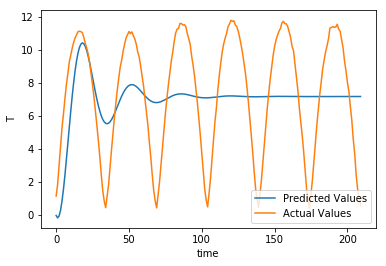

In [228]:
import matplotlib.pyplot as plt
plt.plot(pred['Predicted_Energy'].values)
plt.plot(test['Predicted_Energy'].values)
plt.xlabel("time")
plt.ylabel("T")
plt.legend(["Predicted Values","Actual Values"])

## adding cloud cover as one of the feature

In [ ]:
data['cloudcover'] = cloud#cloud[:len(cloud)-k]

In [ ]:
data.head()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
def create_train_test(k,data,time):
    x = data['Energy'].values[:len(data['Energy'].values)-k]  
    data = data.iloc[k:]
    data['Energy_t'] = x
    #print(data)
    enc = OneHotEncoder(handle_unknown='ignore')
    enc.fit(data['Time'].values.reshape(-1,1))
    X = enc.transform(data['Time'].values.reshape(-1,1))
    #print(data)
   
    data.reset_index(drop=True, inplace=True)
    day_d = pd.DataFrame(X.todense())
    day_d.reset_index(drop=True, inplace=True)
    #print(day_d.shape)
    data = pd.concat([data,day_d],axis=1)
    #print(data)
    data = data.drop(['Time'],axis=1)
    
    train = data.iloc[:day_reading]
    
    test = data.iloc[day_reading:]
    X_train = train.drop(['Energy','Energy_t'],axis=1)
    y_train = train['Energy']
    X_test = test.drop(['Energy','Energy_t'],axis=1)
    y_test = test['Energy']
    return [X_train,X_test,y_train,y_test]

In [249]:
X_train,X_test,y_train,y_test=create_train_test(40,data,time)

In [250]:
X_train.head()

Temperature  humidity  cloudcover    0    1    2    3    4    5    6  ...  \
0        83.66      0.49         0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...   
1        83.66      0.49         0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...   
2        86.18      0.46         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
3        86.18      0.46         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
4        86.18      0.46         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

    25   26   27   28   29   30   31   32   33   34  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 38 columns]

In [ ]:
rmse5 =  []
mape5 =  []
rmse5_t = []
mape5_t = []
for k in range(1,42,5):
    X_train,X_test,y_train,y_test=create_train_test(k,data,time)
    reg = SVR(kernel='linear',gamma = 'auto',C=10,n_jobs=-1)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean For Lag Value:"+str(k)+'---->', math.sqrt(m))
    rmse5.append(math.sqrt(m))
    mape5.append(absolute(y_test.values,y_pred))
    print("MAPE using SVM :", absolute(y_test.values,y_pred))
    rmse5_t.append(m1)
    mape5_t.append(absolute(y_train.values,y_pred1))
    print("***************************************************")
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))

In [ ]:
plt.plot(mape2,marker='o')
plt.plot(mape3,marker='o')
plt.plot(mape4,marker='o')
plt.plot(mape5,marker=o'')
plt.title("MAPE variation with lag values")
plt.legend(['Features: Temperature, Time, Previous Energy','Features: Temperature, Time, Previous Energy,Humidity','Features: Time , Humidity, Temperature','Time , Humidity, Temperature,Cloud Cover'])
plt.xlabel('Lag values')
plt.ylabel('MAPE')
plt.show()

In [ ]:
plt.plot(rmse2,marker='o')
plt.plot(rmse3,marker ='o')
plt.plot(rmse4,marker='o')
plt.plot(rmse5,marker='o')
plt.title("RMSE variation with lag values")
plt.legend(['Temperature, Time, Previous Energy','Temperature, Time, Previous Energy Produced,Humidity','Time, Humidity, Temperature','Time , Humidity, Temperature,Cloud Cover'])
plt.xlabel('Lag values')
plt.ylabel('MAPE')
plt.plot()

In [ ]:
plt.plot(rmse5,marker='o')
plt.plot(rmse5_t,marker='o')
plt.title("Train and Test RMSE Variation with Lag Values")
plt.legend(['Test Error','Train Error'])
plt.xlabel('Lag Values')
plt.ylabel('Root Mean Squared Error')
plt.plot()

In [429]:
train = data.iloc[:day_reading]
test = data.iloc[day_reading:]
X_train = train.drop(['Predicted_Energy'],axis=1)
y_train = train['Predicted_Energy']
X_test = test.drop(['Predicted_Energy'],axis=1)
y_test = test['Predicted_Energy']

In [221]:
# applying SVM over the data using rbf kernel
from sklearn.svm import SVR
opt_v = 99999
y_opt = []
for c in [.001,.01,.1,1,10,100,1000]:
    reg = SVR(kernel='linear',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred

Root Mean squared error using SVM on test data: 1.706130797878072
Root Mean squared error using SVM on test data: 1.7443353875439562
Root Mean squared error using SVM on test data: 1.1255685932153778
Root Mean squared error using SVM on test data: 0.41792314798456964
Root Mean squared error using SVM on test data: 0.2752241466139999
Root Mean squared error using SVM on test data: 0.36508389989947265
Root Mean squared error using SVM on test data: 2.988351681099714


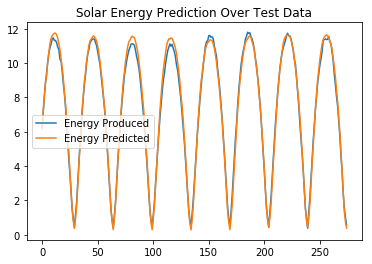

Mean squared error using SVM : 0.2752241466139999
MAPE using SVM : 4.818465110485729


In [222]:
plt.plot(y_test.values)
plt.plot(y_opt)
plt.legend(["Energy Produced","Energy Predicted"])
plt.title("Solar Energy Prediction Over Test Data")
plt.show()
print("Mean squared error using SVM :", opt_v)
print("MAPE using SVM :", MAPE(y_test.values,y_opt))

In [223]:
# applying SVM over the data using rbf kernel
from sklearn.svm import SVR
opt_v = 99999
y_opt = []
for c in [.01,.1,1,10,100,1000]:
    reg = SVR(kernel='rbf',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred

Root Mean squared error using SVM on test data: 2.8494338903536054
Root Mean squared error using SVM on test data: 1.2845618354490058
Root Mean squared error using SVM on test data: 0.7029284581972967
Root Mean squared error using SVM on test data: 0.48359898725833833
Root Mean squared error using SVM on test data: 0.41308244403523686
Root Mean squared error using SVM on test data: 0.6451317435549594


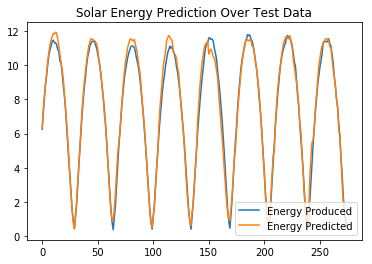

Mean squared error using SVM : 0.41308244403523686
MAPE using SVM : 7.571457655874813


In [224]:
plt.plot(y_test.values)
plt.plot(y_opt)
plt.legend(["Energy Produced","Energy Predicted"])
plt.title("Solar Energy Prediction Over Test Data")
plt.show()
#m = mean_squared_error(y_test,y_pred)
print("Mean squared error using SVM :", opt_v)
print("MAPE using SVM :", MAPE(y_test.values,y_opt))

In [226]:
# applying SVM over the data using rbf kernel
from sklearn.svm import SVR
opt_v = 99999
y_opt = []
for c in [.001,.01,.1,1,10]:
    reg = SVR(kernel='poly',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred

Root Mean squared error using SVM on test data: 0.43542970158734334
Root Mean squared error using SVM on test data: 0.41299226390315585
Root Mean squared error using SVM on test data: 0.570496019408527
Root Mean squared error using SVM on test data: 6.423639275920324
Root Mean squared error using SVM on test data: 42.502566040303705


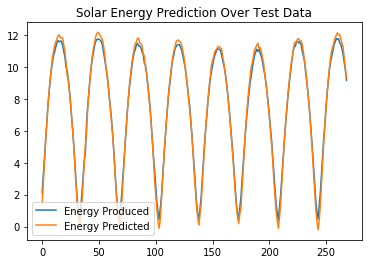

Mean squared error using SVM : 0.307442197544747
MAPE using SVM : 9.50442416431475


In [137]:
plt.plot(y_test.values)
plt.plot(y_opt)
plt.legend(["Energy Produced","Energy Predicted"])
plt.title("Solar Energy Prediction Over Test Data")
plt.show()
#m = mean_squared_error(y_test,y_pred)
print("Mean squared error using SVM :", opt_v)
print("MAPE using SVM :", MAPE(y_test.values,y_opt))

### Adding dewPoint as a feature 

In [ ]:
from sklearn.preprocessing import OneHotEncoder
def create_train_test(k,data,time):
    x = data['Energy'].values[:len(data['Energy'].values)-k]  
    data = data.iloc[k:]
    data['Energy_t'] = x
    #print(data)
    enc = OneHotEncoder(handle_unknown='ignore')
    enc.fit(data['Time'].values.reshape(-1,1))
    X = enc.transform(data['Time'].values.reshape(-1,1))
    #print(data)
   
    data.reset_index(drop=True, inplace=True)
    day_d = pd.DataFrame(X.todense())
    day_d.reset_index(drop=True, inplace=True)
    #print(day_d.shape)
    data = pd.concat([data,day_d],axis=1)
    #print(data)
    data = data.drop(['Time'],axis=1)
    
    train = data.iloc[:day_reading]
    
    test = data.iloc[day_reading:]
    X_train = train.drop(['Energy'],axis=1)
    y_train = train['Energy']
    X_test = test.drop(['Energy'],axis=1)
    y_test = test['Energy']
    return [X_train,X_test,y_train,y_test]

In [ ]:
data.head()

In [ ]:
data['dewPoint'] = dewpoint

In [262]:
X_train,X_test,y_train,y_test=create_train_test(40,data,time)

In [263]:
X_train.head()

Temperature  humidity  cloudcover  dewPoint  Energy_t    0    1    2    3  \
0        83.66      0.49         0.0     62.30     0.706  0.0  0.0  0.0  0.0   
1        83.66      0.49         0.0     62.30     1.366  0.0  0.0  0.0  0.0   
2        86.18      0.46         0.0     63.09     2.404  0.0  0.0  0.0  0.0   
3        86.18      0.46         0.0     63.09     3.546  0.0  0.0  0.0  0.0   
4        86.18      0.46         0.0     63.09     4.682  0.0  0.0  0.0  0.0   

     4  ...   25   26   27   28   29   30   31   32   33   34  
0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 40 columns]

In [ ]:
rmse6 =  []
mape6 =  []
rmse6_t=[]
mape6_t=[]
for k in range(1,40):
    X_train,X_test,y_train,y_test=create_train_test(k,data,time)
    reg = SVR(kernel='linear',gamma = 'auto',C=10,n_jobs=-1)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean For Lag Value:"+str(k)+'---->', math.sqrt(m))
    rmse6.append(math.sqrt(m))
    mape6.append(absolute(y_test.values,y_pred))
    print("MAPE using SVM :", absolute(y_test.values,y_pred))
    print("***************************************************")
    rmse6_t.append(m1)
    mape6_t.append(absolute(y_train.values,y_pred1))
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
    #if math.sqrt(m) < opt_v:
    #    opt_v = math.sqrt(m)
    #    y_opt = y_pred

In [ ]:
plt.plot(mape2,marker='o')
plt.plot(mape3,marker='o')
plt.plot(mape4,marker='o')
plt.plot(mape5,marker='o')
plt.plot(mape5,marker='o')
plt.plot(mape6,marker='o')
plt.title("MAPE variation with lag values")
plt.legend(['Features: Temperature, Time, Previous Energy','Features: Temperature, Time, Previous Energy,Humidity','Features: Time , Humidity, Temperature','Time , Humidity, Temperature,Cloud Cover','Time , Humidity, Temperature, Cloud Cover,Dew Point'])
plt.xlabel('Lag values')
plt.ylabel('MAPE')
plt.show()

In [ ]:
plt.plot(rmse2,marker='o')
plt.plot(rmse3,marker ='o')
plt.plot(rmse4,marker='o')
plt.plot(rmse5,marker='o')
plt.plot(rmse6,marker='o')
plt.title("RMSE variation with lag values")
plt.legend(['Temperature, Time, Previous Energy','Temperature, Time, Previous Energy Produced,Humidity','Time, Humidity, Temperature','Time , Humidity, Temperature,Cloud Cover','Time , Humidity, Temperature, Cloud Cover,Dew Point'])
plt.xlabel('Lag values')
plt.ylabel('MAPE')
plt.plot()

In [ ]:
plt.plot(rmse6,marker='o')
plt.plot(rmse6_t,marker='o')
plt.title("Train and Test RMSE Variation with Lag Values")
plt.legend(['Test Error','Train Error'])
plt.xlabel('Lag Values')
plt.ylabel('Root Mean Squared Error')
plt.plot()

In [233]:
#train = data.iloc[:day_reading]
#test = data.iloc[day_reading:]
#X_train = train.drop(['Predicted_Energy'],axis=1)
#y_train = train['Predicted_Energy']
#X_test = test.drop(['Predicted_Energy'],axis=1)
#y_test = test['Predicted_Energy']

In [234]:
# applying SVM over the data using rbf kernel
from sklearn.svm import SVR
opt_v = 99999
y_opt = []
for c in [.001,.01,.1,1,10,100,1000]:
    reg = SVR(kernel='linear',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred

Root Mean squared error using SVM on test data: 1.6524618477462716
Root Mean squared error using SVM on test data: 1.7015538743094045
Root Mean squared error using SVM on test data: 1.0877040642259475
Root Mean squared error using SVM on test data: 0.4275163259827908
Root Mean squared error using SVM on test data: 0.27857164287811925
Root Mean squared error using SVM on test data: 0.3442892618978496
Root Mean squared error using SVM on test data: 3.239247556453851


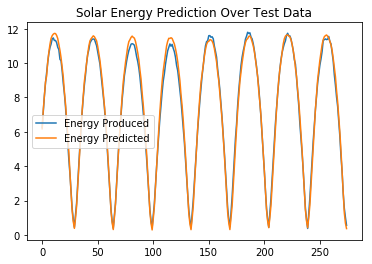

Mean squared error using SVM : 0.27857164287811925
MAPE using SVM : 4.974528785249727


In [235]:
plt.plot(y_test.values)
plt.plot(y_opt)
plt.legend(["Energy Produced","Energy Predicted"])
plt.title("Solar Energy Prediction Over Test Data")
plt.show()
#m = mean_squared_error(y_test,y_pred)
print("Mean squared error using SVM :", opt_v)
print("MAPE using SVM :", MAPE(y_test.values,y_opt))

## Time, Temperature, Humidity, Previous Energy, Dew Point
### (REMOVING CLOUD COVER FEATURE)

In [236]:
train = data.iloc[:day_reading]
test = data.iloc[day_reading:]
X_train = train.drop(['Predicted_Energy','cloudcover'],axis=1)
y_train = train['Predicted_Energy']
X_test = test.drop(['Predicted_Energy','cloudcover'],axis=1)
y_test = test['Predicted_Energy']

In [237]:
X_train.head()

Temperature  Energy    0    1    2    3    4    5    6    7  ...   27   28  \
0        84.88   0.706  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1        84.65   1.366  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2        84.65   2.404  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3        84.65   3.546  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4        85.29   4.682  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0   

    29   30   31   32   33   34  humidity  dewPoint  
0  0.0  0.0  0.0  0.0  0.0  0.0      0.51     64.47  
1  0.0  0.0  0.0  0.0  0.0  0.0      0.49     63.53  
2  0.0  0.0  0.0  0.0  0.0  0.0      0.49     63.53  
3  0.0  0.0  0.0  0.0  0.0  0.0      0.49     63.53  
4  0.0  0.0  0.0  0.0  0.0  0.0      0.48     63.44  

[5 rows x 39 columns]

In [238]:
# applying SVM over the data using rbf kernel
from sklearn.svm import SVR
opt_v = 99999
y_opt = []
for c in [.001,.01,.1,1,10,100,1000]:
    reg = SVR(kernel='linear',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred

Root Mean squared error using SVM on test data: 1.6522627260171856
Root Mean squared error using SVM on test data: 1.703057624456089
Root Mean squared error using SVM on test data: 1.0941526292374977
Root Mean squared error using SVM on test data: 0.3820543292419173
Root Mean squared error using SVM on test data: 0.28150589739436405
Root Mean squared error using SVM on test data: 0.38890689134981277
Root Mean squared error using SVM on test data: 3.119743105442636


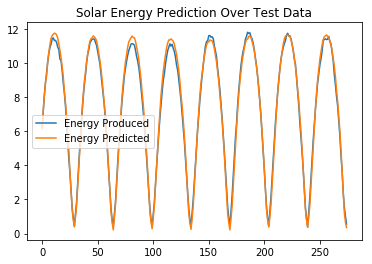

Mean squared error using SVM : 0.28150589739436405
MAPE using SVM : 5.6452684063322405


In [239]:
plt.plot(y_test.values)
plt.plot(y_opt)
plt.legend(["Energy Produced","Energy Predicted"])
plt.title("Solar Energy Prediction Over Test Data")
plt.show()
#m = mean_squared_error(y_test,y_pred)
print("Mean squared error using SVM :", opt_v)
print("MAPE using SVM :", MAPE(y_test.values,y_opt))

## Adding Wind Speed to the model

In [240]:
data['windSpeed'] = windspeed[:len(windspeed)-k]

In [241]:
data.head()

Temperature  Energy  Predicted_Energy    0    1    2    3    4    5    6  \
0        84.88   0.706             5.847  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
1        84.65   1.366             6.792  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
2        84.65   2.404             7.541  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
3        84.65   3.546             8.396  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
4        85.29   4.682             9.002  0.0  0.0  0.0  0.0  1.0  0.0  0.0   

   ...   29   30   31   32   33   34  humidity  cloudcover  dewPoint  \
0  ...  0.0  0.0  0.0  0.0  0.0  0.0      0.51         0.0     64.47   
1  ...  0.0  0.0  0.0  0.0  0.0  0.0      0.49         0.0     63.53   
2  ...  0.0  0.0  0.0  0.0  0.0  0.0      0.49         0.0     63.53   
3  ...  0.0  0.0  0.0  0.0  0.0  0.0      0.49         0.0     63.53   
4  ...  0.0  0.0  0.0  0.0  0.0  0.0      0.48         0.0     63.44   

   windSpeed  
0       6.60  
1       7.60  
2       7.60  
3       7.60  
4       8.57  

[5 rows x 42 columns]

In [242]:
train = data.iloc[:day_reading]
test = data.iloc[day_reading:]
X_train = train.drop(['Predicted_Energy','cloudcover'],axis=1)  # adding cloud cover decreasing the rmse score so removing it from the feature set
y_train = train['Predicted_Energy']
X_test = test.drop(['Predicted_Energy','cloudcover'],axis=1)
y_test = test['Predicted_Energy']

In [243]:
X_train.head()

Temperature  Energy    0    1    2    3    4    5    6    7  ...   28   29  \
0        84.88   0.706  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1        84.65   1.366  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2        84.65   2.404  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3        84.65   3.546  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4        85.29   4.682  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0   

    30   31   32   33   34  humidity  dewPoint  windSpeed  
0  0.0  0.0  0.0  0.0  0.0      0.51     64.47       6.60  
1  0.0  0.0  0.0  0.0  0.0      0.49     63.53       7.60  
2  0.0  0.0  0.0  0.0  0.0      0.49     63.53       7.60  
3  0.0  0.0  0.0  0.0  0.0      0.49     63.53       7.60  
4  0.0  0.0  0.0  0.0  0.0      0.48     63.44       8.57  

[5 rows x 40 columns]

In [244]:
# applying SVM over the data using rbf kernel
from sklearn.svm import SVR
opt_v = 99999
y_opt = []
for c in [.001,.01,.1,1,10,100,1000]:
    reg = SVR(kernel='linear',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred

Root Mean squared error using SVM on test data: 1.6371759573174243
Root Mean squared error using SVM on test data: 1.6718113201937268
Root Mean squared error using SVM on test data: 1.0573509849215093
Root Mean squared error using SVM on test data: 0.3723234457709362
Root Mean squared error using SVM on test data: 0.2760978094105017
Root Mean squared error using SVM on test data: 0.4216263320706376
Root Mean squared error using SVM on test data: 2.631253061581266


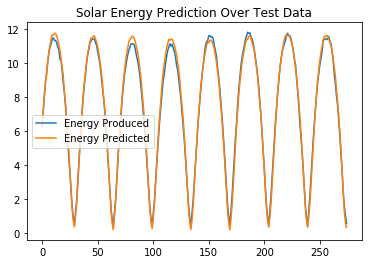

Mean squared error using SVM : 0.2760978094105017
MAPE using SVM : 6.039208132791408


In [245]:
plt.plot(y_test.values)
plt.plot(y_opt)
plt.legend(["Energy Produced","Energy Predicted"])
plt.title("Solar Energy Prediction Over Test Data")
plt.show()
print("Mean squared error using SVM :", opt_v)
print("MAPE using SVM :", MAPE(y_test.values,y_opt))

### Adding windBearing as a feature

In [246]:
k = 40
data['windBearing'] = wBearing[:len(wBearing)-k]

In [247]:
data.head()

Temperature  Energy  Predicted_Energy    0    1    2    3    4    5    6  \
0        84.88   0.706             5.847  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
1        84.65   1.366             6.792  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
2        84.65   2.404             7.541  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
3        84.65   3.546             8.396  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
4        85.29   4.682             9.002  0.0  0.0  0.0  0.0  1.0  0.0  0.0   

   ...   30   31   32   33   34  humidity  cloudcover  dewPoint  windSpeed  \
0  ...  0.0  0.0  0.0  0.0  0.0      0.51         0.0     64.47       6.60   
1  ...  0.0  0.0  0.0  0.0  0.0      0.49         0.0     63.53       7.60   
2  ...  0.0  0.0  0.0  0.0  0.0      0.49         0.0     63.53       7.60   
3  ...  0.0  0.0  0.0  0.0  0.0      0.49         0.0     63.53       7.60   
4  ...  0.0  0.0  0.0  0.0  0.0      0.48         0.0     63.44       8.57   

   windBearing  
0          235  
1          229  
2          229  
3          229  
4          233  

[5 rows x 43 columns]

In [249]:
train = data.iloc[:day_reading]
test = data.iloc[day_reading:]
X_train = train.drop(['Predicted_Energy','cloudcover'],axis=1)  # adding cloud cover decreasing the rmse score so removing it from the feature set
y_train = train['Predicted_Energy']
X_test = test.drop(['Predicted_Energy','cloudcover'],axis=1)
y_test = test['Predicted_Energy']

In [250]:
# applying SVM over the data using rbf kernel
from sklearn.svm import SVR
opt_v = 99999
y_opt = []
for c in [.001,.01,.1,1,10,100]:
    reg = SVR(kernel='linear',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred

Root Mean squared error using SVM on test data: 1.5978263464014397
Root Mean squared error using SVM on test data: 1.6278322927120514
Root Mean squared error using SVM on test data: 0.9788353259807587
Root Mean squared error using SVM on test data: 0.40087249256237417
Root Mean squared error using SVM on test data: 0.3460472333971547
Root Mean squared error using SVM on test data: 2.640833596120636


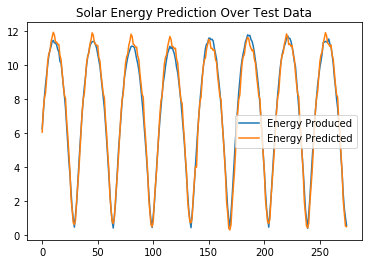

Mean squared error using SVM : 0.3460472333971547
MAPE using SVM : 6.8711741587226145


In [251]:
plt.plot(y_test.values)
plt.plot(y_opt)
plt.legend(["Energy Produced","Energy Predicted"])
plt.title("Solar Energy Prediction Over Test Data")
plt.show()
#m = mean_squared_error(y_test,y_pred)
print("Mean squared error using SVM :", opt_v)
print("MAPE using SVM :", MAPE(y_test.values,y_opt))

### Removing Energy as a feature

In [252]:
train = data.iloc[:day_reading]
test = data.iloc[day_reading:]
X_train = train.drop(['Predicted_Energy','Energy'],axis=1)  # adding cloud cover decreasing the rmse score so removing it from the feature set
y_train = train['Predicted_Energy']
X_test = test.drop(['Predicted_Energy','Energy'],axis=1)
y_test = test['Predicted_Energy']

In [253]:
# applying SVM over the data using rbf kernel
from sklearn.svm import SVR
opt_v = 99999
y_opt = []
for c in [.001,.01,.1,1,10,100]:
    reg = SVR(kernel='linear',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred

Root Mean squared error using SVM on test data: 2.3113203899884156
Root Mean squared error using SVM on test data: 2.184926690410175
Root Mean squared error using SVM on test data: 1.1667852880125669
Root Mean squared error using SVM on test data: 0.39622446012315843
Root Mean squared error using SVM on test data: 0.5282417310061528
Root Mean squared error using SVM on test data: 4.077779298785611


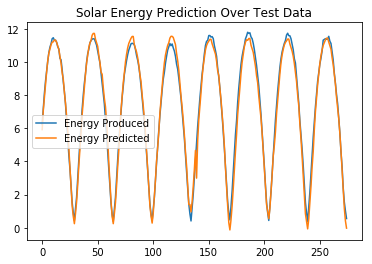

Mean squared error using SVM : 0.39622446012315843
MAPE using SVM : 8.985136090997136


In [254]:
plt.plot(y_test.values)
plt.plot(y_opt)
plt.legend(["Energy Produced","Energy Predicted"])
plt.title("Solar Energy Prediction Over Test Data")
plt.show()
#m = mean_squared_error(y_test,y_pred)
print("Mean squared error using SVM :", opt_v)
print("MAPE using SVM :", MAPE(y_test.values,y_opt))